# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lab 2: EDA with Pandas (+seaborn)¶

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai<br/>
**Authors**: Natesh Pillai

In [1]:
import requests
from IPython.core.display import HTML
# получение css стилей
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

В этой лекции мы рассмотрим инструменты для построения построения, используя как Matplotlib, так и Seaborn.

## загрузить данные

Файл *Quartets.csv* содержит 4 различных крошечных набора данных, которые мы будем использовать для быстрого понимания значения построения.

In [5]:
quartets = pd.read_csv('quartets.csv', index_col=0)

### Исследование


In [6]:
quartets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


Мы видим, что есть 44 записи, два численных столбца X и Y и один столбец, чтобы потенциально идентифицировать каждый набор данных квартета.

Как выглядит этот фрейм данных?

In [7]:
quartets.head()

,dataset,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [11]:
# взяла другой датасет, для лучшего понимания привела все к нужному наименованию столбцов
quartets.rename(columns = {'dataset': 'quartet'}, inplace=True)

Как выглядят случайные образцы?

In [8]:
quartets.sample(5)

,dataset,x,y
id,,,
21,II,5.0,4.74
2,I,13.0,7.58
4,I,11.0,8.33
41,IV,8.0,5.56
10,I,5.0,5.68


Какие существуют имена квартетов

In [12]:
quartets['quartet'].unique().tolist()

['I', 'II', 'III', 'IV']

Отображать первые 3 образца из каждого набора данных

In [13]:
quartets.groupby('quartet').head(3)

,quartet,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74


Отобразить 2 случайных образца из каждого набора данных

In [16]:
quartets.groupby('quartet').sample(2)

,quartet,x,y
id,,,
10,I,5.0,5.68
0,I,10.0,8.04
15,II,11.0,9.26
12,II,8.0,8.14
31,III,7.0,6.42
27,III,14.0,8.84
36,IV,8.0,8.84
40,IV,19.0,12.50


Отобразить размер набора данных каждого квартета

In [17]:
quartets.groupby('quartet').size()

quartet
I      11
II     11
III    11
IV     11
dtype: int64

## Описательная статистика

In [19]:
quartets.groupby('quartet').agg(['mean', 'std']).round(2)

x          y      
        mean   std mean   std
quartet                      
I        9.0  3.32  7.5  2.03
II       9.0  3.32  7.5  2.03
III      9.0  3.32  7.5  2.03
IV       9.0  3.32  7.5  2.03

Почти одинаковое среднее и стандартное отклонение для каждого квартета.
Похоже, что все образцы квартетов могут быть отобраны из одного и того же распределения.
Это крошечные наборы данных, поэтому мы могли прочитать их все

In [20]:
quartets[quartets['quartet'] == 'I']

,quartet,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84


In [22]:
quartets[quartets['quartet'] == 'II']

,quartet,x,y
id,,,
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13


In [23]:
quartets[quartets['quartet'] == 'III']

,quartet,x,y
id,,,
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15


In [24]:
quartets[quartets['quartet'] == 'IV']

,quartet,x,y
id,,,
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56


## Построение графиков

Pandas по умолчанию поставляется с Matplotlib Incorporated.

*Seaborn - это библиотека визуализации данных Python, основанная на Matplotlib.*

*Он предоставляет интерфейс высокого уровня для рисования привлекательной и информативной статистической графики*

### BoxPlot


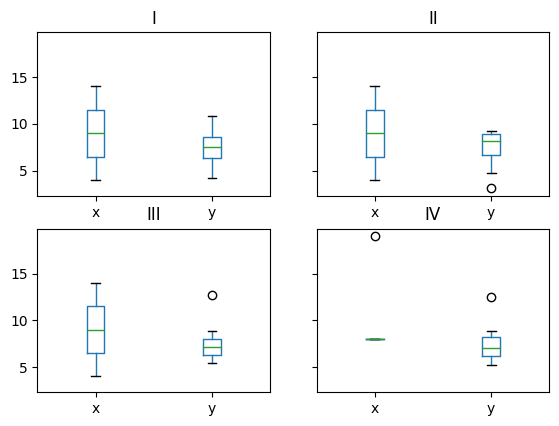

In [25]:
quartets.groupby('quartet').boxplot(grid=False);

[Seaborn's palettes](#https://seaborn.pydata.org/tutorial/color_palettes.html)

In [26]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [27]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [28]:
palette = 'pastel'

**Seaborn's boxplots**

Подобные ящики у Matplotlib и Seaborn

Text(0.5, 0.98, 'Ящиковые диаграммы квартетов')

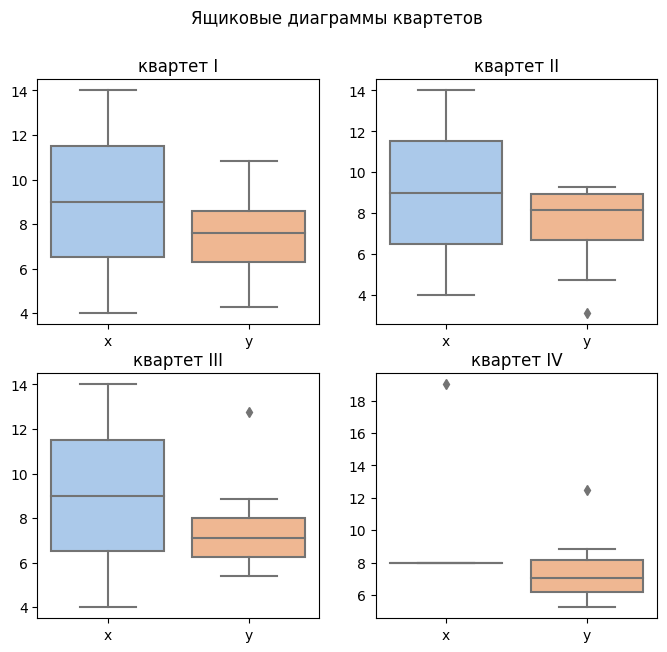

In [34]:
# Создаем фигуру с 2x2 подграфиками и устанавливаем размер 8x7 дюймов
fig, axes = plt.subplots(2, 2, figsize=(8,7))

# Выравниваем оси в одномерный список 
axes = axes.flatten().tolist()

# Проходимся по каждой группе в датафрейме quartets
for quartet, g in quartets.groupby('quartet'):
    # Извлекаем следующую ось из списка и присваиваем ее переменной ax
    ax = axes.pop(0)
    
    # Создаем ящиковую диаграмму для текущей группы и задаем ей цветную палитру
    sns.boxplot(data=g, ax=ax, palette=palette)
    
    # Устанавливаем заголовок оси, указывающий номер квартета
    ax.set_title(f'квартет {quartet}')

# Добавляем заголовок к фигуре
plt.suptitle("Ящиковые диаграммы квартетов")
 



 # Объяснение кода
- Код создает фигуру с подграфиками размером 2 строки на 2 столбца, всего 4 подграфика.
- Размер фигуры задан как 8x7 дюймов.
- Массив с осями преобразуется в одномерный список и сохраняется в переменной axes.
 - Датафрейм quartets группируется по столбцу 'quartet', что дает отдельные группы для каждого квартета.
 - В цикле проходимся по каждой группе, извлекая следующую ось из списка и присваивая ее переменной ax.
 - Для текущей группы создается ящиковая диаграмма, которая отображается в оси ax. Также указывается цветовая палитра.
 - Заголовок оси устанавливается так, чтобы указать номер квартета.
 - Эти шаги повторяются для каждого квартета в датафрейме.
 - Наконец, добавляется заголовок к фигуре в целом.

In [45]:
quartets.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


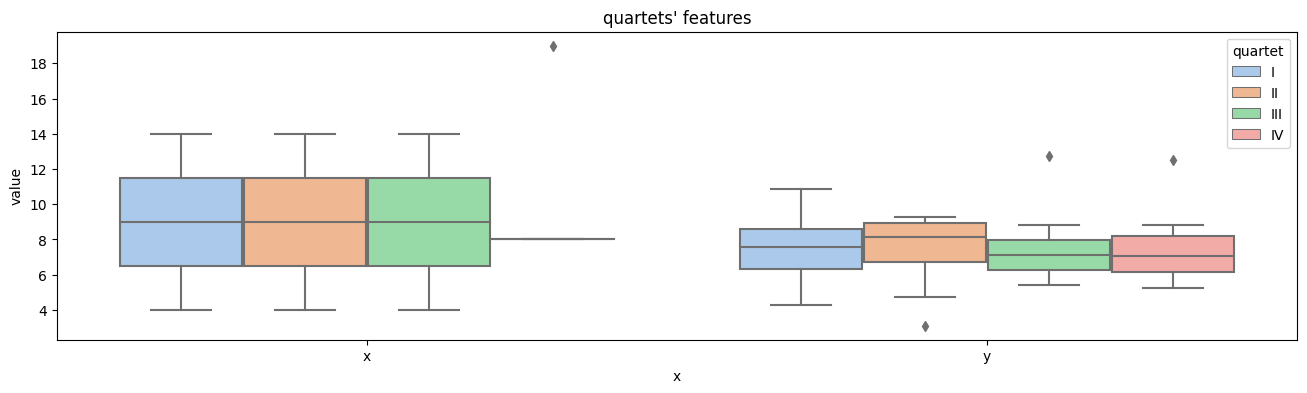

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
sns.boxplot(x ='x', y ='value', hue='quartet',
            data = pd.melt(quartets, id_vars='quartet', var_name='x', value_name='value'),
            ax=ax, palette=palette)
ax.set_title("quartets' features");




1. `sns.boxplot`: Это функция из библиотеки `seaborn`, которая создает ящиковую диаграмму.

2. `x ='x', y ='x_value', hue='quartet'`: Это параметры функции `boxplot`. Здесь `x` означает столбец, значения которого будут использоваться для разделения данных горизонтально по оси x. `y` представляет столбец, значения которого будут использоваться для разделения данных по вертикальной оси y. `hue` указывает на другой столбец, который будет использоваться для разделения данных по дополнительному условию (в данном случае группирует данные по столбцу 'quartet').

3. `data = pd.melt(quartets, id_vars='quartet', var_name='x', value_name='x_value')`: Здесь осуществляется подготовка данных для построения ящиковой диаграммы. Функция `melt` из библиотеки `pandas` используется для преобразования данных из широкого формата в длинный формат. В данном случае, исходный датафрейм `quartets` преобразуется так, чтобы столбцы 'quartet' остались неизменными, а все остальные столбцы были преобразованы в два новых столбца - 'x' (который будет содержать имена этих столбцов) и 'value' (который будет содержать сами значения переформатированных столбцов).

4. `ax= ax`: Здесь `ax` представляет собой объект `Axes` - область для рисования. Он используется для настройки параметров графика, например, для установки заголовка, подписей к осям или установки размеров. В данном случае, предполагается, что `ax` уже создан в коде до этого места и здесь он передается для построения ящиковой диаграммы.

5. `palette=palette`: Здесь `palette` представляет собой параметр, который указывает на цветовую палитру, которая будет использоваться для отображения разных категорий данных.

Итак, данный код создает ящиковую диаграмму, преобразуя данные из широкого формата в длинный формат, группируя их по заданным столбцам и дополнительному условию. Результат будет отображен на заданной области для рисования.

Проблема с графиком выше заключается в том, что мы заставляем разные функции (например, `x` и` y`) поделиться одной и той же осью Y.

Итак, еще одним способом достижения цели может быть эта цель

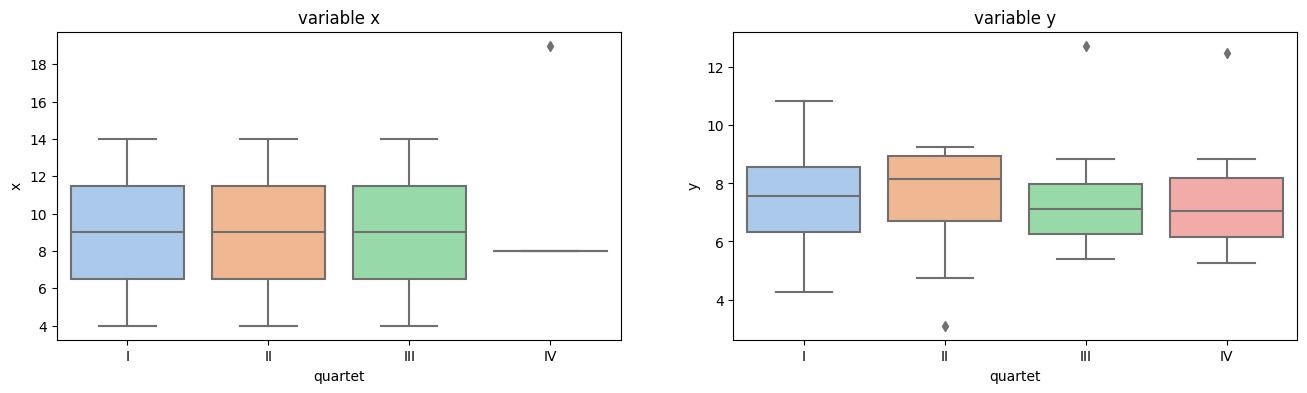

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
for i, col in enumerate(['x', 'y']):
    sns.boxplot(x ='quartet', y=col, data=quartets, ax=axes[i], palette=palette);
    axes[i].set_title(f'variable {col}')

В данном коде происходит создание двух ящиковых диаграмм, разделенных по переменным `'x'` и `'y'`. Разберем его по шагам:

1. `fig, axes = plt.subplots(1, 2, figsize=(16,4))`: Здесь мы создаем область для рисования (`figure`) и две области для расположения графиков (`axes`). `plt.subplots` создает указанное количество областей для рисования. В данном случае, мы создаем 1 строку и 2 столбца областей для размещения 2 графиков. `figsize=(16,4)` устанавливает размеры фигуры (ширина 16 дюймов, высота 4 дюйма).

2. `for i, col in enumerate(['x', 'y']):`: Здесь мы перебираем переменные `'x'` и `'y'` с помощью цикла `for` и `enumerate`. При каждой итерации, `i` будет содержать индекс переменной, а `col` - саму переменную.

3. `sns.boxplot(x ='quartet', y=col, data=quartets, ax=axes[i], palette=palette);`: В этой строке мы создаем ящиковую диаграмму с помощью `sns.boxplot`. Параметр `x='quartet'` указывает на столбец, который будет использоваться для разделения данных горизонтально. Параметр `y=col` указывает на переменную, значение которой будет использоваться для разделения данных вертикально в каждом графике. Параметр `data=quartets` указывает на источник данных - датафрейм `quartets`. Параметр `ax=axes[i]` указывает на область для рисования (одну из двух созданных ранее) для размещения данного графика. Параметр `palette=palette` указывает на цветовую палитру, которая будет использоваться для отображения разных категорий.

4. `axes[i].set_title(f'variable {col}')`: Здесь мы устанавливаем заголовок для каждого графика. `axes[i]` получает соответствующую область для рисования, а `set_title` устанавливает текст заголовка с использованием форматирования строк `f'variable {col}'` (например, для переменной 'x' заголовок будет 'variable x').

Итак, данный код создает две ящиковые диаграммы, разделенные по переменным `'x'` и `'y'` в исходном датафрейме `quartets`, и отображает их на двух областях для рисования, размещенных в одной строке и двух столбцах в фигуре. Каждому графику устанавливается заголовок, отражающий соответствующую переменную.

### Histograms

В пандас легко построить гистограмму особенностей отдельного квартета в одной строке кода.

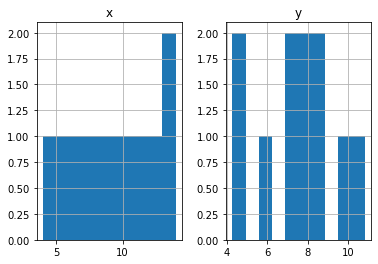

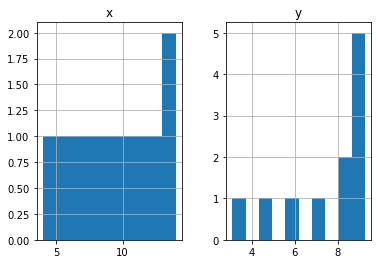

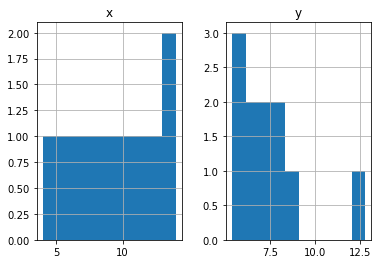

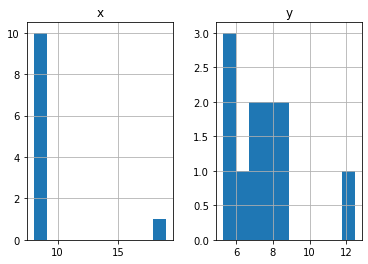

In [24]:
quartets.groupby('quartet').hist();

Гистограммы позволяют нам начать видеть некоторые различия

**Seaborn's histograms**

[seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Мы могли бы сделать то же самое с Seaborn с этим кодом

In [ ]:
for quartet, g in quartets.groupby('quartet'):
    fig, axes = plt.subplots(1 , 2, figsize=(8, 2.5))
    sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=True);
    sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=True);
    plt.suptitle(f'Quartet {quartet}')

1. `for quartet, g in quartets.groupby('quartet'):`
   - Здесь происходит итерация по группам `quartet` в объекте `quartets`, при помощи метода `groupby`. Каждая группа записывается в переменную `g`, а значение `quartet` записывается в переменную `quartet`.

2. `fig, axes = plt.subplots(1 , 2, figsize=(8, 2.5))`
   - Создается объект рисунка (`fig`) и массив объектов осей (`axes`). В данном случае создается рисунок с 1 строкой и 2 столбцами, то есть будет 2 графика в одной строке.

3. `sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=True);`
   - Здесь используется функция `histplot` из библиотеки `seaborn` для создания гистограммы. `data` указывает на объект данных (`g`), `x` указывает на столбец данных по оси x, `hue` указывает на столбец данных, по которому будет осуществляться разделение на цвета, `ax` указывает на объект осей, на котором будет создан график, `palette` задает цветовую палитру, `bins` задает количество интервалов гистограммы, а `kde` указывает на отображение ядерной оценки плотности.

4. `sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=True);`
   - Аналогично предыдущему пункту, только генерируется гистограмма для столбца данных по оси y.

5. `plt.suptitle(f'Quartet {quartet}')`
   - Эта строка кода устанавливает заголовок рисунка, указывая номер квартета из итерации. Заголовок будет иметь формат "Quartet {quartet}", где `{quartet}` - это текущий номер квартета.

Мы можем построить все функции всех квартетов `x` и` y` на двух разных графиках

In [58]:
quartets.columns

Index(['quartet', 'x', 'y'], dtype='object')

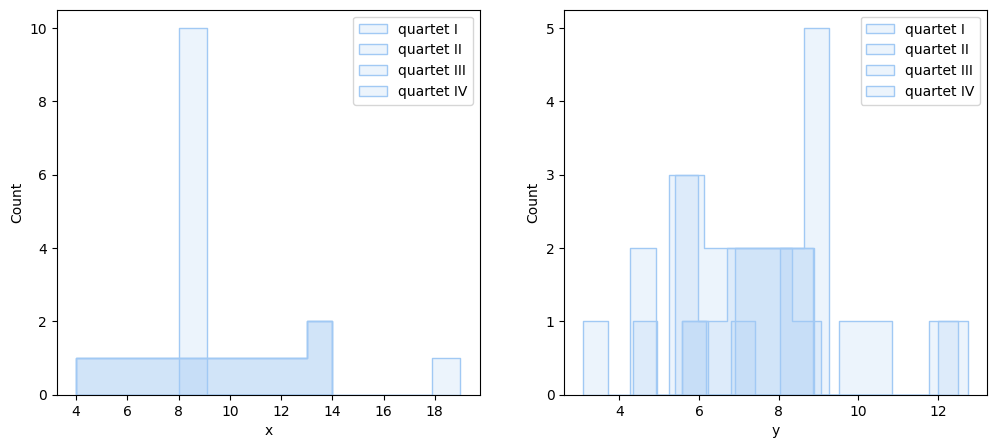

In [59]:
# Некоторые элементы - «полосы» (по умолчанию, но слишком шумно при построении стольких функций), «Шаг», «Поли»
element = 'step'
fig, axes = plt.subplots(1 , 2, figsize=(12, 5))
legends = []
for quartet, g in quartets.groupby('quartet'):
    legends.append(f'quartet {quartet}')
    sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=False, alpha=.2, element=element);
    sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=False, alpha=.2, element=element);
    
axes[0].legend(legends)
axes[1].legend(legends);

1. `element = 'step'` - Здесь переменной `element` присваивается значение `'step'`. Это значение будет использовано в функции `histplot` для задания стиля отображения гистограммы.

2. `fig, axes = plt.subplots(1 , 2, figsize=(12, 5))` - Создается объект рисунка (`fig`) и массив объектов осей (`axes`). В данном случае создается рисунок с 1 строкой и 2 столбцами, то есть будет 2 графика в одной строке. Также задается размер рисунка `(12, 5)`.

3. `legends = []` - Создается пустой список `legends`, который будет использоваться для хранения легенд.

4. `for quartet, g in quartets.groupby('quartet'):` - Здесь происходит итерация по группам `quartet` в объекте `quartets`, при помощи метода `groupby`. Каждая группа записывается в переменную `g`, а значение `quartet` записывается в переменную `quartet`.

5. `legends.append(f'quartet {quartet}')` - В каждой итерации записывается строка `'quartet {quartet}'` в список `legends`, где `{quartet}` - это текущий номер квартета.

6. `sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=False, alpha=.2, element=element);` - Здесь используется функция `histplot` из библиотеки `seaborn` для создания гистограммы. `data` указывает на объект данных (`g`), `x` указывает на столбец данных по оси x, `hue` указывает на столбец данных, по которому будет осуществляться разделение на цвета, `ax` указывает на объект осей, на котором будет создан график, `palette` задает цветовую палитру, `bins` задает количество интервалов гистограммы, `kde` указывает на отключение отображения ядерной оценки плотности, `alpha` задает уровень прозрачности столбцов гистограммы, а `element` указывает на стиль отображения гистограммы.

7. `sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=False, alpha=.2, element=element);` - Аналогично предыдущему пункту, только генерируется гистограмма для столбца данных по оси y.

8. `axes[0].legend(legends)` - Добавляет легенду в первый график (оси axes[0]). Легенда будет содержать элемеы списка `legends`, то есть строки в формате `'quartet {quartet}'`, где `{quartet}` - это номер квартета.

9. `axes[1].legend(legends)` - Добавляет легенду во второй график (оси axes[1]). Легенда будет содержать элемеы списка `legends`, то есть строки в формате `'quartet {quartet}'`, где `{quartet}` - это номер квартета.

### FacetGrid
Это мощный инструмент, который можно использовать в сочетании с методом построения от Seaborn или даже Matplotlib для построения нескольких сюжетов на основе некоторых условных отношений.

[`seaborn.FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html): Многоустановка сетка для построения условных отношений.

**Grid of histograms**

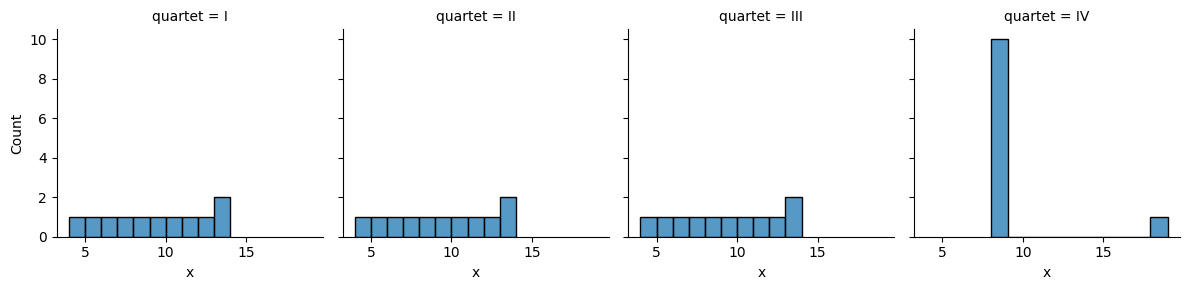

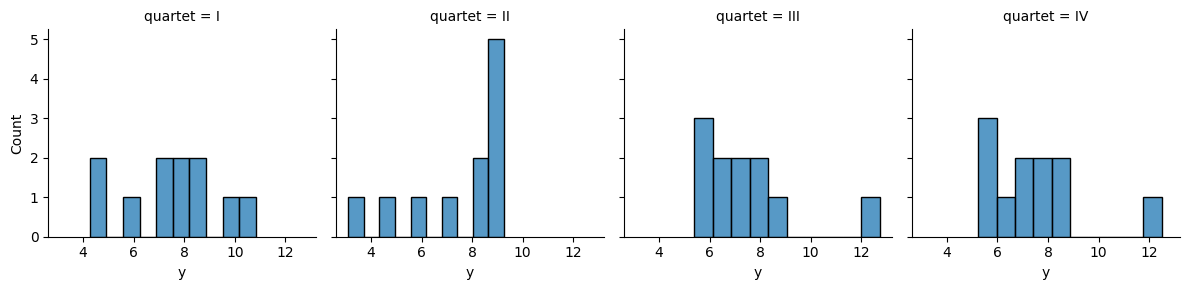

In [61]:
# для свойств(содержимого каждой ячейки в столбце х и у)
for feature in ['x', 'y']:
    # 
    g = sns.FacetGrid(quartets, col="quartet", palette=palette, col_wrap=4)
    # 
    g.map(sns.histplot, feature, bins=10);
    
# Определите количество столбцов.Измените значение на 3 и 2, чтобы визуально понять его поведение

1. `for feature in ['x', 'y']:` - Цикл выполняет итерацию по каждому элементу (столбцу) в списке `['x', 'y']`, где `feature` - это переменная, которая будет содержать текущий элемент.
2. `g = sns.FacetGrid(quartets, col="quartet", palette=palette, col_wrap=4)` - Создается объект `FacetGrid` из библиотеки `seaborn`. Параметр `quartets` представляет собой DataFrame данных, который будет использоваться для построения графиков. Параметр `col="quartet"` указывает, что генерируемые подграфики будут разбиты по значениям, содержащимся в столбце "quartet" из DataFrame. Параметр `palette=palette` задает цветовую палитру, которая будет использоваться для графиков. Параметр `col_wrap=4` указывает, что каждая строка графиков будет содержать максимум 4 графика.
3. `g.map(sns.histplot, feature, bins=10);` - Происходит картографирование гистограммы на `FacetGrid`. Функция `map` принимает два параметра: функцию `sns.histplot`, которая будет вызываться для каждого подграфика, и параметр `feature`, который указывает на столбец данных, который будет использоваться для построения гистограммы. Параметр `bins=10` задает количество интервалов гистограммы. В итоге будет построена гистограмма для каждой комбинации столбца "quartet" и текущего столбца (feature) из списка ['x', 'y'].

Мы можем создать один FacetGrid для всех.Для этого нам нужно преобразовать DataFrame в доступ к значениям на основе условий.

In [62]:
melted = pd.melt(quartets, id_vars='quartet', var_name='x', value_name='value').rename(columns={'x':'variable'})
melted

,quartet,variable,value
0,I,x,10.00
1,I,x,8.00
2,I,x,13.00
3,I,x,9.00
4,I,x,11.00
...,...,...,...
83,IV,y,5.25
84,IV,y,12.50
85,IV,y,5.56
86,IV,y,7.91


В представленном коде для преобразования DataFrame `quartets` используется функция `pd.melt` из библиотеки pandas.

Функция `melt` преобразует DataFrame, переплавляя его в новую форму, где столбец `quartet` используется в качестве переменной-идентификатора (id_vars), а все остальные столбцы переплавляются в два столбца: 'variable', содержащий имена столбцов из исходного DataFrame, и 'value', содержащий соответствующие значения.

В полученном DataFrame столбец 'x' переименовывается в 'variable'.

В результате будет получен расплавленный DataFrame с переменной quartet в качестве идентификатора и исходными именами столбцов и значениями в виде отдельных столбцов.

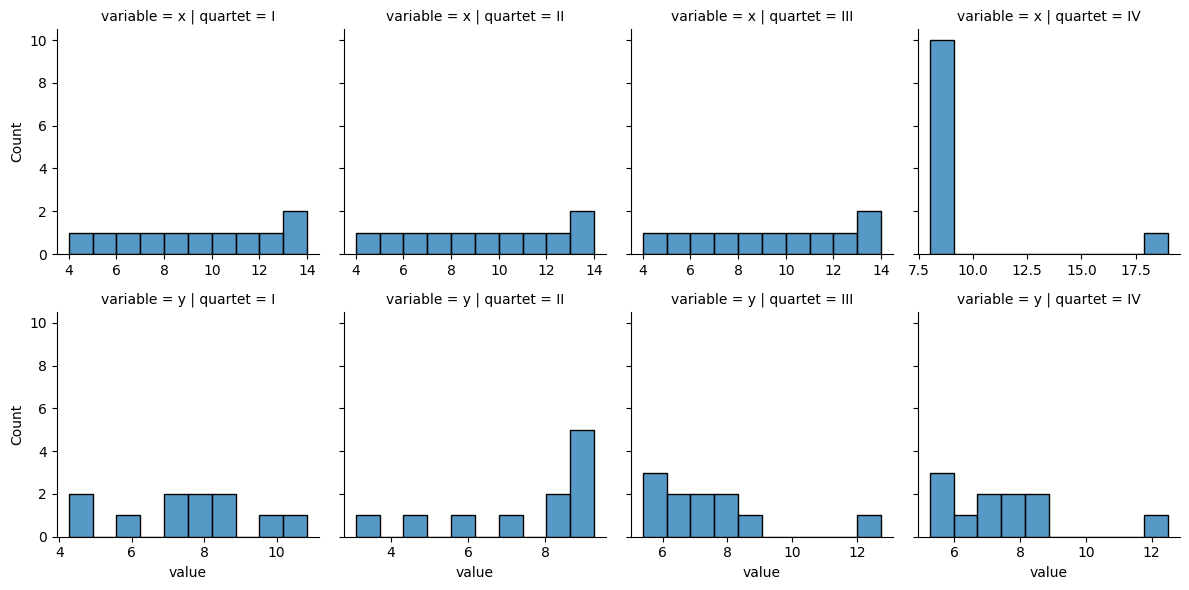

In [63]:
# Создать сетку с квартетами в виде столбцов и переменных в виде рядов
g = sns.FacetGrid(melted, row="variable", col='quartet', palette=palette, sharex=False)
g.map(sns.histplot, 'value', bins=10);
# Нам нужно установить SEL Sharex на false, чтобы избежать искажения форм между рядами (вы можете попытаться изменить его на True)

### рассеяние участки
Зная, что у нас есть функции `x` и` y`, мы можем подумать об использовании других полезных сюжетов.Почему не рассеянный сюжет?

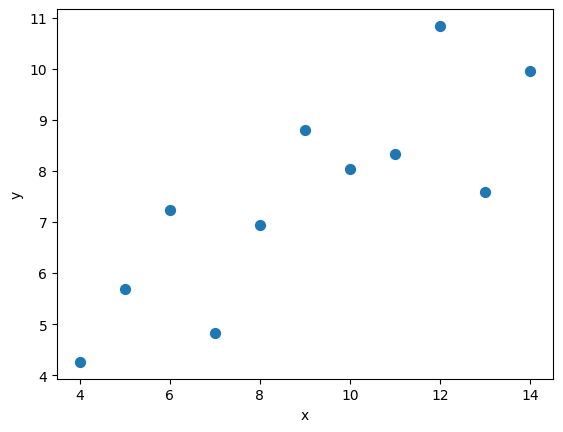

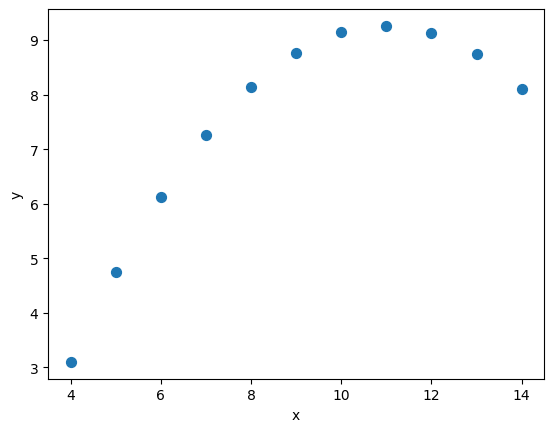

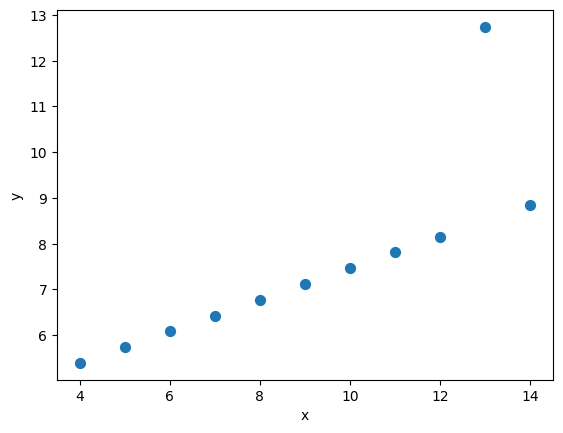

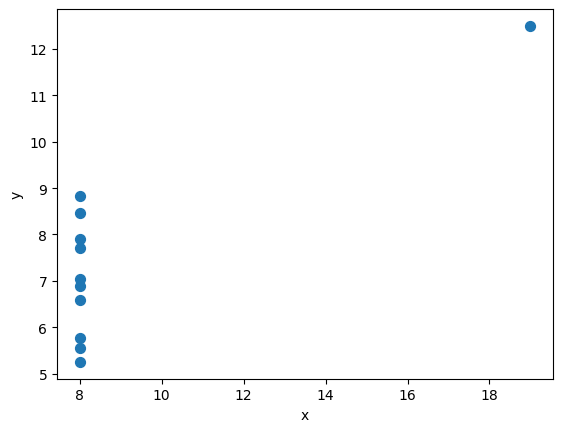

In [64]:
quartets.groupby('quartet').plot.scatter(x='x', y='y', s=50);

**Scatter plots with seaborn**

Мы можем объединить Matplotlib с Seaborn, чтобы улучшить эстетику.

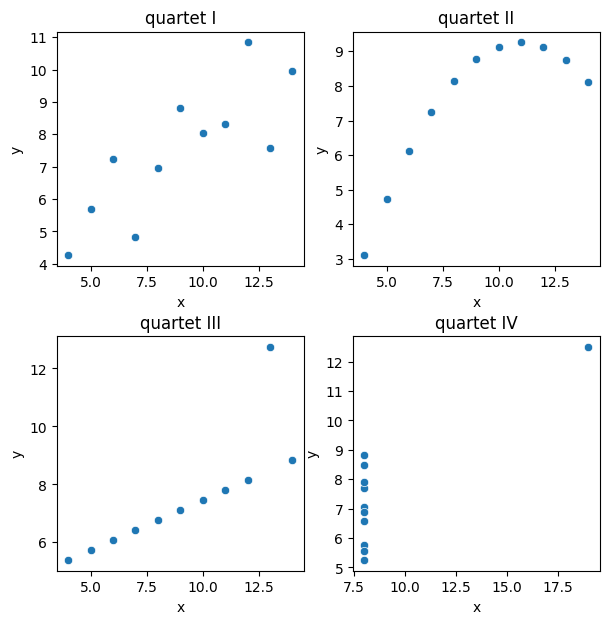

In [65]:
fig, axes = plt.subplots(2,2,figsize=(7,7))
axes = axes.flatten().tolist()
for quartet, g in quartets.groupby('quartet'):
    ax = axes.pop(0)
    sns.scatterplot(data=g, x='x', y='y', ax=ax)    
    ax.set_title(f'quartet {quartet}')
plt.subplots_adjust(hspace=0.3);

Этот код создает график из 2x2 подграфиков с размером фигуры 7x7 (в дюймах). Подграфики рассчитываются в плоском списке `axes`, используя функцию `flatten()`. 

Затем цикл `for` проходится по каждой группе данных `g`, сгруппированных по столбцу 'quartet' из DataFrame `quartets`. Внутри цикла каждый подграфик `ax` извлекается из списка `axes` с помощью `pop(0)` для последующей настройки и построения графика. 

Функция `sns.scatterplot` используется для создания точечной диаграммы, где значения по оси X берутся из столбца 'x', а значения по оси Y - из столбца 'y' в группе `g`. 

Метод `ax.set_title` устанавливает заголовок для каждого подграфика, присваивая ему значение 'quartet' для текущей группы. 

Наконец, функция `plt.subplots_adjust(hspace=0.3)` используется для настройки расстояния между подграфиками по вертикальной оси (горизонтальное расстояние автоматически отрегулировано).

**Scatter plots with FacetGrid**
FacetGrid отлично, чтобы не писать слишком много строк кода Matplotlib.В этом случае мы можем заставить сетку обмениваться доменом x и y для упрощения сравнения доменов функций.

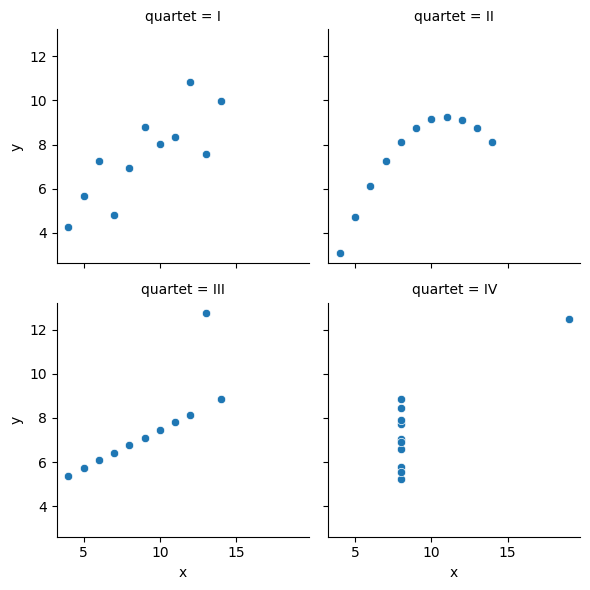

In [66]:
g = sns.FacetGrid(quartets, col='quartet', palette=palette, col_wrap=2, sharex=True, sharey=True)
g.map(sns.scatterplot, 'x', 'y');

### Line plots
Мы также могли бы использовать линейный завод, но для этого нам нужно знать, что точки должны быть заказаны на оси x.

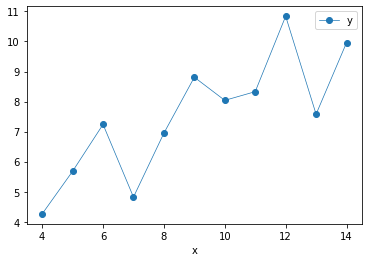

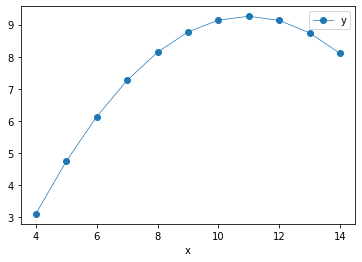

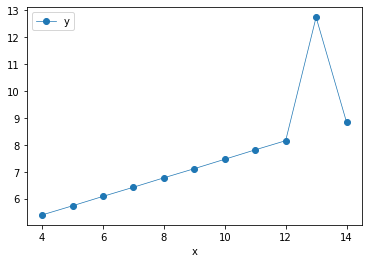

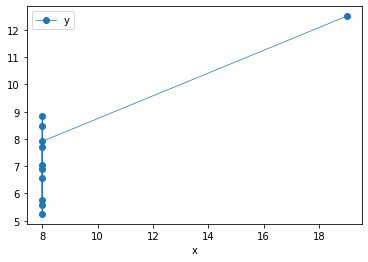

In [33]:
quartets.sort_values(by='x').groupby('quartet').plot(x='x', y='y', marker='o', lw=.7);

В данном коде сортируется DataFrame `quartets` по столбцу 'x' с использованием метода `sort_values`. Затем происходит группировка данных по столбцу 'quartet' с помощью метода `groupby`. Для каждой группы вызывается метод `plot`, который создает график для каждого 'quartet'. 

В аргументе `x='x'` указывается столбец 'x' в DataFrame как ось абсцисс, а в аргументе `y='y'` указывается столбец 'y' как ось ординат. Аргумент `marker='o'` задает символ для точек на графике (в данном случае, круги), а аргумент `lw=.7` устанавливает толщину линий на графике. 

Таким образом, код создает график для каждого 'quartet', где значения по оси X берутся из столбца 'x', значения по оси Y - из столбца 'y', точки обозначены кругами, а линии имеют толщину 0.7.

### Все в одном
Мы также можем использовать Matplotlib для графика всех групп на одном и том же графике

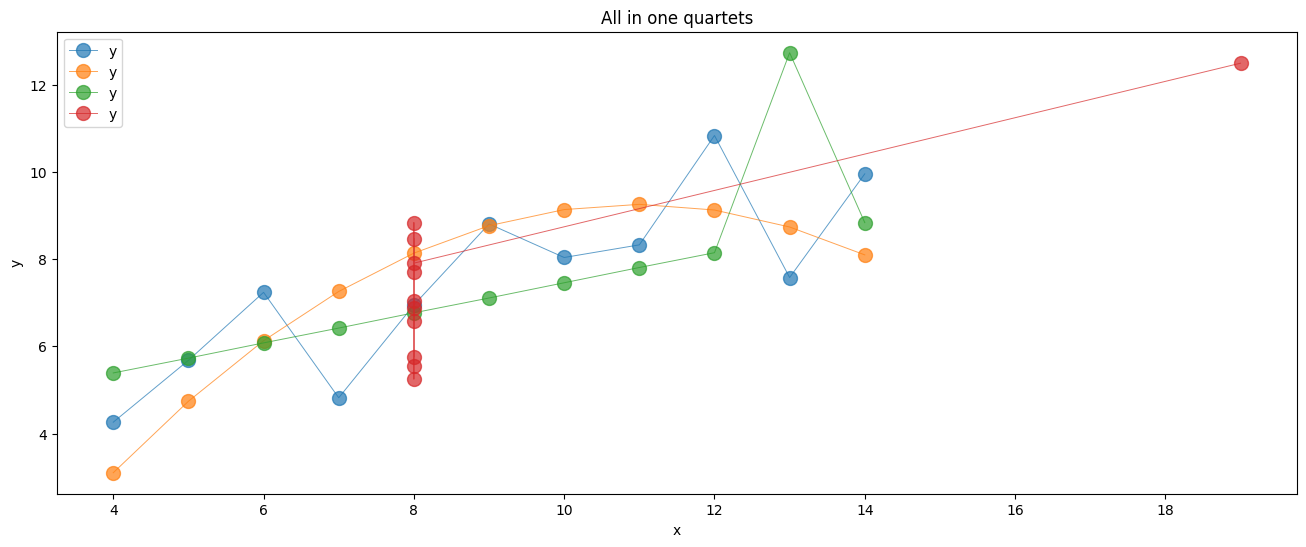

In [71]:
# создать фигуру 
fig, ax = plt.subplots(1,1,figsize=(16,6))
# все кварталы нарисовать по одной оси, отсортировать по х, сгруппировать по квартетам, использовать маркер о, толщину линии 0.7, размер символов 10(включая маркеры)
quartets.sort_values(by='x').groupby('quartet').plot(x='x', y='y', marker='o', ms=10, lw=0.7, alpha=.7, ax=ax)
plt.ylabel('y')
plt.title('All in one quartets');

В данном коде выполняются следующие действия:
1. Сортировка DataFrame `quartets` по столбцу 'x' с использованием метода `sort_values`.
2. Группировка данных в DataFrame по столбцу 'quartet' с помощью метода `groupby`.
3. Вызов метода `plot` для каждой группы, используя `x='x'` как ось абсцисс, `y='y'` как ось ординат. Аргумент `marker='o'` задает символ для точек на графике, `ms=10` устанавливает размер символа, `lw=.7` задает толщину линий на графике, а `alpha=.7` устанавливает уровень прозрачности.
4. В аргументе `ax=ax` передается ось (axes) для построения графика.
5. Функция `plt.ylabel('y')` устанавливает название оси ординат для всей фигуры.
6. Функция `plt.title('All in one quartets')` устанавливает заголовок для всей фигуры.
Таким образом, код создает подграфики, в каждом из которых отображены точки сгруппированные по 'quartet', где значения по оси X берутся из столбца 'x', значения по оси Y - из столбца 'y'. Оси оснoвного графика (фигуры) имеют названия 'y' и 'All in one quartets'. Точки обозначены кругами, размером 10, линии имеют толщину 0.7, а символы точек на графике и линии имеют прозрачность 0.7.

### Lineplots with seaborn

[Seaborn.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) упрощает создание того же графика.

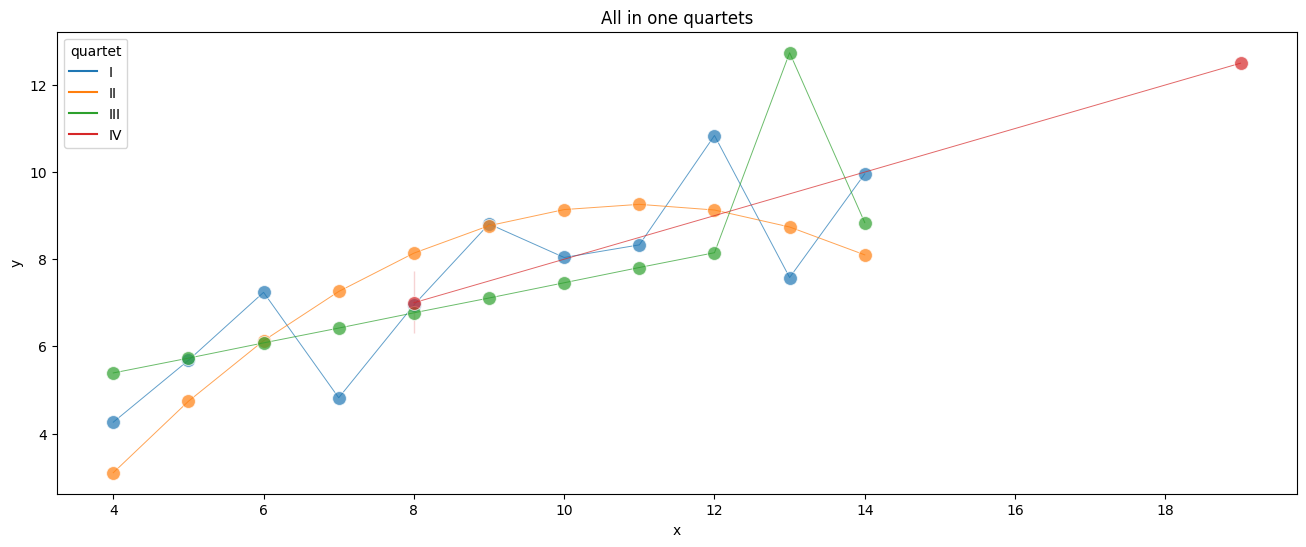

In [72]:
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.lineplot(data=quartets, x='x', y='y', hue='quartet', marker='o', ms=10, lw=.7, alpha=.7, ax=ax)
plt.title('All in one quartets');

И мы можем построить все квартеты вместе (удаление условного `hue 'для Seaborn)

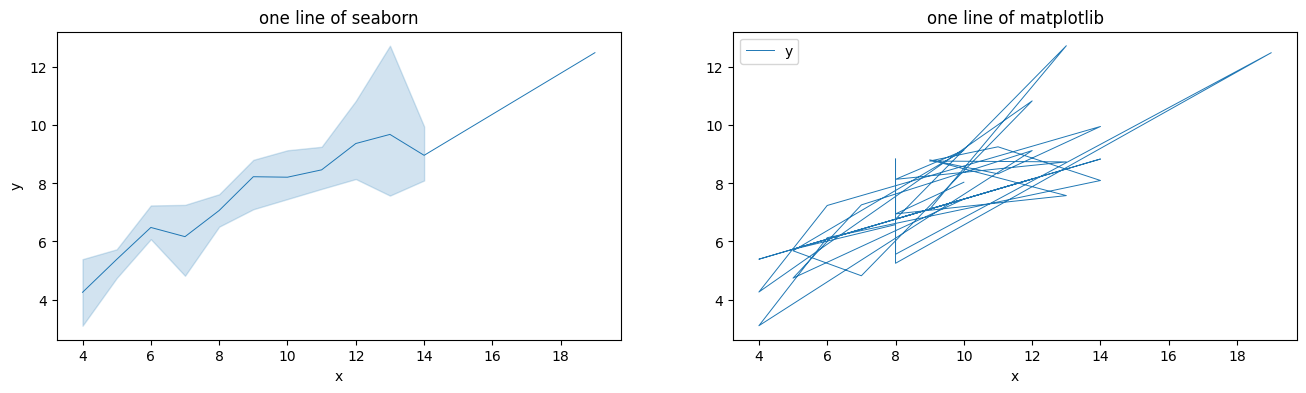

In [73]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.lineplot(data=quartets, x='x', y='y', lw=.7, ax=axes[0])
axes[0].set_title('one line of seaborn')
quartets.plot(x='x', y='y', lw=.7, ax=axes[1])
axes[1].set_title('one line of matplotlib');

Seaborn построен на Matplotlib, поэтому использование большего количества линий matplotlib должно позволить вам прибыть на тот же заговор Seaborn.

## давайте использовать другой набор данных

Мы загрузим уже известный набор данных.

Источник: https://www.kaggle.com/spscientist/students-performance-in-exams
Первоначальный генератор источника: http://roycekimmons.com/tools/generated_data/exams

Если вы перейдете к первоначальному источнику, вы обнаружите, что это фиктивный набор данных, созданный специально для учебных целей.

In [74]:
df = pd.read_csv('StudentsPerformance.csv').rename(
        columns={
            'race/ethnicity': 'group',
            'parental level of education': 'parental',
            'test preparation course': 'course',
            'math score': 'math',
            'reading score': 'reading',
            'writing score': 'writing'
        }
    )

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    1000 non-null   object
 1   group     1000 non-null   object
 2   parental  1000 non-null   object
 3   lunch     1000 non-null   object
 4   course    1000 non-null   object
 5   math      1000 non-null   int64 
 6   reading   1000 non-null   int64 
 7   writing   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [76]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [77]:
df['group'].unique().tolist()

['group B', 'group C', 'group A', 'group D', 'group E']

### Давайте упростим DataFrame

Мы можем упростить групповые значения до буквы группы

** series.str **

[`Series.str`] (https://pandas.pydata.org/docs/reference/api/pandas.series.str.html): векторизованные строковые функции для серии и индекса.

In [78]:
df['group'] = df['group'].str[-1]
df['group'].unique().tolist()

['B', 'C', 'A', 'D', 'E']

In [79]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


In [80]:
df['course'].unique()

array(['none', 'completed'], dtype=object)

**Series.apply**

[`Series.apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html):Вызвать функцию на значениях серии.

```python
Series.apply(func, convert_dtype=True, args=(), **kwargs)
```

In [82]:
# Мы проверяем, что еще никогда не изменяем значения этого столбца
if 'completed' in df['course'].unique().tolist():
    df['course'] = df['course'].apply(lambda x: 1 if x == 'completed' else 0)

# Мы можем изменить тип значений столбца на логический
df['course'] = df['course'].astype(bool)
df['course'].unique()

array([False,  True])

В данном коде выполняются следующие действия:
1. Проверка, что значение 'completed' есть в уникальных значениях столбца 'course' в DataFrame `df`. Это делается с помощью методов `unique()` и `tolist()`.
2. Если значение 'completed' есть в столбце 'course', то столбец 'course' изменяется с помощью метода `apply` и лямбда-функции. Лямбда-функция присваивает значение 1, если значение в столбце равно 'completed', иначе присваивается значение 0.
3. Тип значений в столбце 'course' изменяется на логический с помощью метода `astype(bool)`.
4. Вывод уникальных значений столбца 'course' с помощью метода `unique()`. 

Таким образом, код проверяет, есть ли значение 'completed' в столбце 'course' и изменяет значения в этом столбце на логические: True для 'completed' и False для любых других значений. Затем выводится список уникальных значений столбца 'course', которые могут быть только True или False.

In [83]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,False,72,72,74
1,female,C,some college,standard,True,69,90,88
2,female,B,master's degree,standard,False,90,95,93
3,male,A,associate's degree,free/reduced,False,47,57,44
4,male,C,some college,standard,False,76,78,75


## Missing values

In [85]:
df.isna().sum()

gender      0
group       0
parental    0
lunch       0
course      0
math        0
reading     0
writing     0
dtype: int64

Ни одна из серии столбцов не присутствует в пропущенных значениях

**Некоторые вопросы:**
- Влияет ли пол на оценки по математике?
- Влияют ли баллы по математике на пол? 
- Влияют ли баллы по чтению и письму на баллы по математике? 
- Влияют ли баллы по математике на баллы по чтению и письму? 
- Влияет ли одна группа на успеваемость по математике лучше, чем остальные?
- Влияет ли уровень образования родителей на оценки по математике?

In [88]:
df[['reading','math']].sample(5)

,reading,math
530,67,68
724,43,47
4,78,76
393,54,57
364,60,59


In [89]:
df[['reading','math']].describe()

,reading,math
count,1000.000000,1000.00000
mean,69.169000,66.08900
std,14.600192,15.16308
min,17.000000,0.00000
25%,59.000000,57.00000
50%,70.000000,66.00000
75%,79.000000,77.00000
max,100.000000,100.00000


Это совсем не распространено, чтобы увидеть ноль на оценках.Здесь мы видим 0, найденное в математике

In [90]:
df[df['math'] == 0]

,gender,group,parental,lunch,course,math,reading,writing
59,female,C,some high school,free/reduced,False,0,17,10


Этот образец выглядит возможным?Почему?

#### Histograms for our selected variables

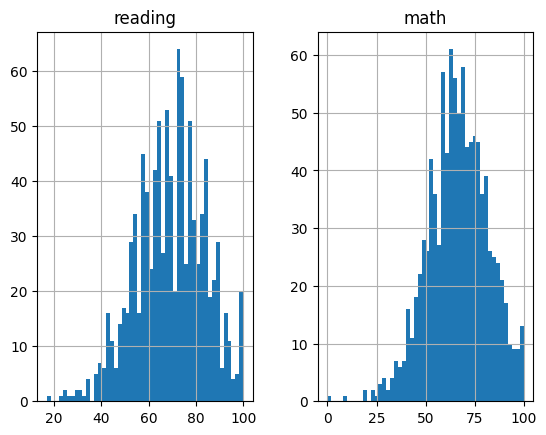

In [93]:
df[['reading', 'math']].hist(bins=50, grid=True);

#### Гистограммы для наших выбранных переменных (seaborn)

[seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Мы можем построить гистограмму на разных участках, используя графики matplotlib

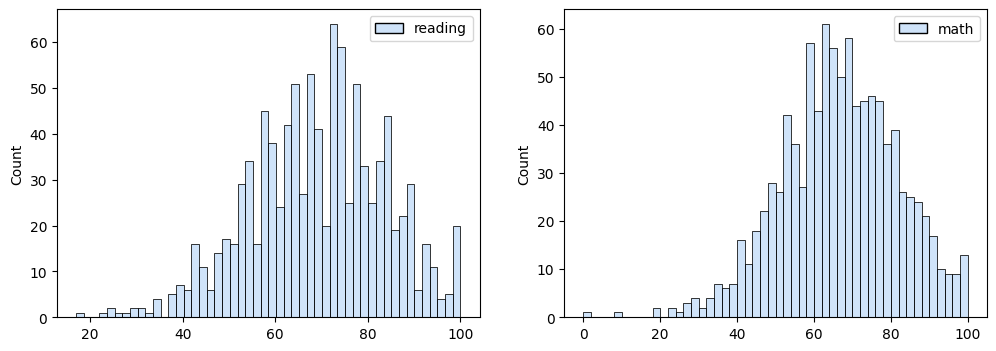

In [95]:
plt.figure(figsize=(12,4))
sns.histplot(df[['reading']], bins=50, ax=plt.subplot(121), palette=palette)
sns.histplot(df[['math']], bins=50, ax=plt.subplot(122), palette=palette);

Но зная, что по умолчанию sns.histplot объединяет все функции в один и тот же сюжет, это может быть проще

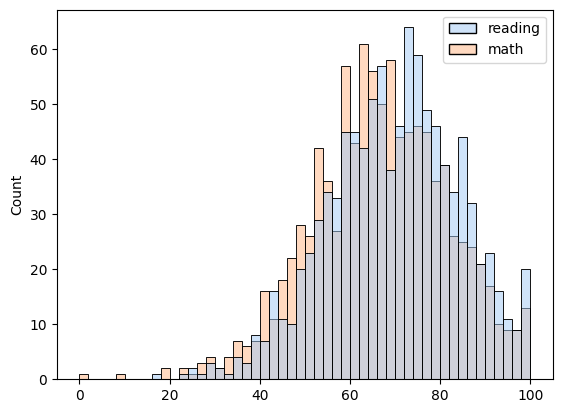

In [94]:
sns.histplot(df[['reading', 'math']], bins=50, palette=palette);

#### Kernel Density Estimate

Оценка плотности ядра

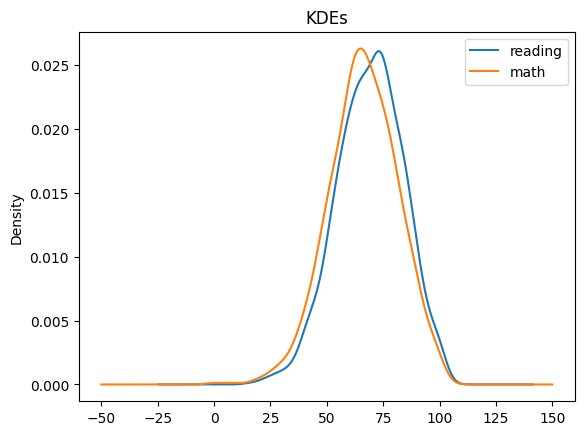

In [96]:
df[['reading', 'math']].plot.kde()
plt.title('KDEs');

Seaborn поставляется с методом[`seaborn.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) Чтобы создать графики плотности ядра, но мы можем просто установить Histplot Params KDE для их объединения.

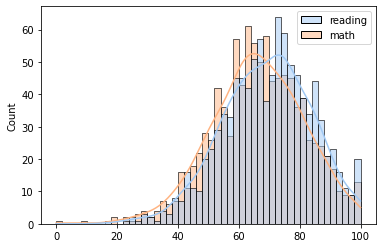

In [54]:
sns.histplot(df[['reading', 'math']], bins=50, kde=True, palette=palette);

#### BoxPlot

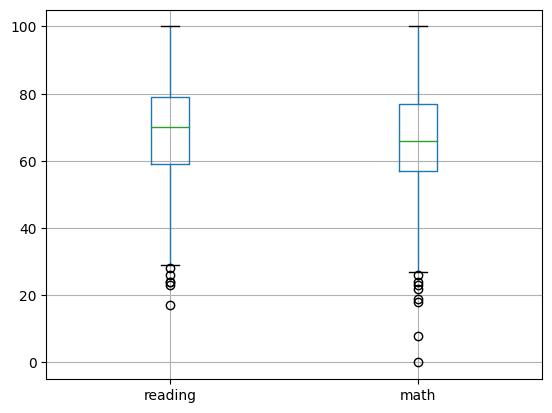

In [97]:
df[['reading', 'math']].boxplot();

При первом взгляде распределения выглядят так же, как и можно было ожидать.Математическая оценка распределение выглядит немного сдвинутым вниз.

**Boxplots with seaborn**

[`seanborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

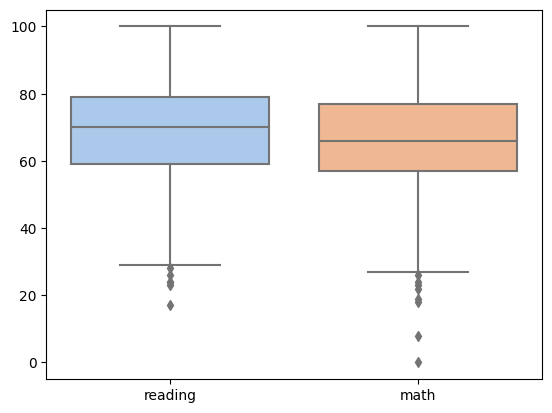

In [98]:
sns.boxplot(data=df[['reading', 'math']], palette=palette);

**Boxenplots or Letter values**

[`seaborn.boxenplot()`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html)

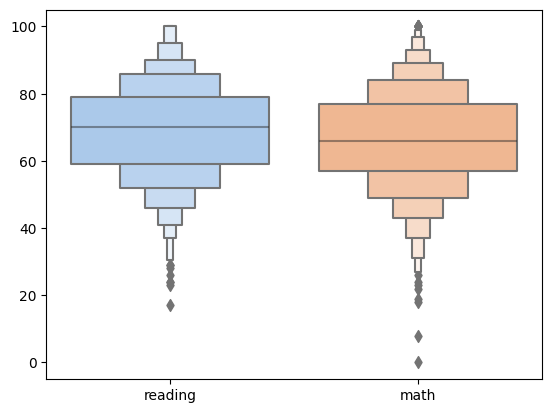

In [99]:
sns.boxenplot(data=df[['reading', 'math']], palette=palette);

**Violinplots**

[`seaborn.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

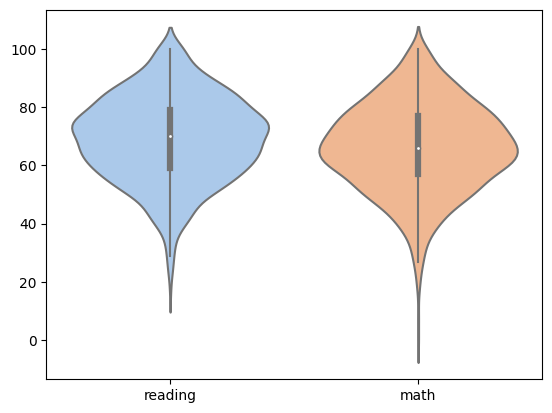

In [100]:
sns.violinplot(data=df[['reading', 'math']], palette=palette);

## Как насчет связи между результатами? Они взаимодействуют?


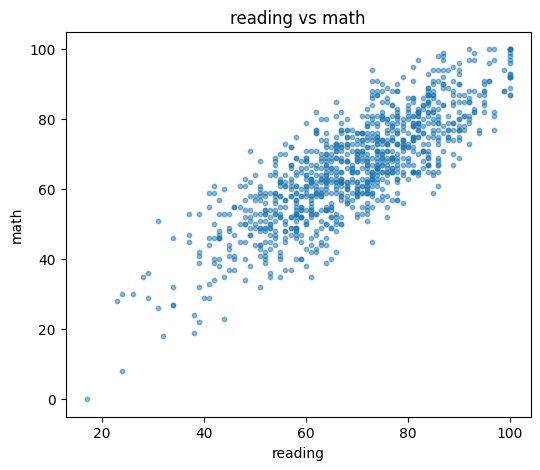

In [101]:
df.plot.scatter(x='reading', y='math', s=10, alpha=.5, figsize=(6,5))
plt.title('reading vs math');

Существует визуальная корреляция между этими переменными.

### Correlation
Pandas has implemented a method named `corr()`.

`DataFrame.corr()`: Вычислить парную корреляцию столбцов, за исключением значений Na/NULL.
```python
DataFrame.corr(method='pearson', min_periods=1)
```


In [60]:
df[['reading', 'math']].corr()

,reading,math
reading,1.00000,0.81758
math,0.81758,1.00000


Панды`corr()` предлагает различные методы корреляции.В большинстве случаев `pearson` или/и `spearman` методы идти.

In [61]:
for method in ['pearson', 'kendall', 'spearman']:
    # ILOC используется для доступа к значению на втором столбце первой строки.
    corr = df[['reading', 'math']].corr(method=method).iloc[0,1]
    print(f'{method} correlation: {corr:.3f}')

pearson correlation: 0.818
kendall correlation: 0.617
spearman correlation: 0.804


Корреляция Кендалла – это статистическая мера, которая измеряет степень согласованности между двумя ранговыми переменными. Она используется для определения силы и направления связи между двумя переменными без предположений о линейности или нормальном распределении данных. Корреляция Кендалла является непараметрическим методом оценки корреляции и особенно полезна для ранжирования данных или категориальных переменных.

Корреляция Кендалла может принимать значения от -1 до 1, где:
- Значение +1 указывает на полную положительную корреляцию, при которой с ростом значений одной переменной растут значения другой переменной.
- Значение -1 указывает на полную отрицательную корреляцию, при которой с ростом значений одной переменной уменьшаются значения другой переменной.
- Значение 0 указывает на отсутствие корреляции или случайную связь между переменными.

Для вычисления корреляции Кендалла можно использовать функцию `kendall()` из пакета `scipy.stats`. Она принимает две переменные или массива данных и возвращает значение коэффициента корреляции Кендалла.

Пример использования корреляции Кендалла:

```
from scipy.stats import kendalltau

# Вычисление корреляции Кендалла между двумя переменными
correlation, p_value = kendalltau(data1, data2)

print("Значение корреляции Кендалла:", correlation)
print("p-значение:", p_value)
```

Здесь `data1` и `data2` - это две переменные или массивы данных, между которыми мы хотим вычислить корреляцию Кендалла. Результатом является значение корреляции и p-значение, которое указывает на статистическую значимость корреляции.

Корреляция Кендалла и коэффициент корреляции Пирсона измеряют степень линейной связи между двумя переменными. Однако, эти два коэффициента могут быть различными по нескольким причинам:

1. Нелинейная связь: Коэффициент корреляции Пирсона измеряет только линейную связь между переменными и не учитывает нелинейные отношения. Если связь между переменными является нелинейной, корреляция Кендалла может быть более низкой, так как она учитывает не только линейную, но и монотонную связь между переменными.

2. Выбросы: Коэффициент корреляции Пирсона чувствителен к выбросам, то есть к экстремальным значениям в данных. Если в данных есть выбросы, коэффициент корреляции Пирсона может быть искажен. Корреляция Кендалла менее чувствительна к выбросам и поэтому может быть более надежной мерой связи в таких случаях.

3. Несимметричные отклонения: Коэффициент корреляции Пирсона использует отклонения переменных от их средних значений. Если распределение данных неправильно симметрично (например, имеет тяжелые хвосты), то коэффициент корреляции Пирсона может быть искажен. Корреляция Кендалла не основывается на отклонениях от средних значений и может быть более устойчивой в таких случаях.

4. Ранговая мера: Корреляция Кендалла измеряет степень согласованности ранговых порядков переменных, в то время как коэффициент корреляции Пирсона использует исходные значения переменных. Если переменные имеют близкие значения, но разные порядки, корреляция Кендалла может быть ниже, чем коэффициент корреляции Пирсона.

В целом, разница между корреляцией Кендалла и коэффициентом корреляции Пирсона может быть вызвана разными свойствами данных или специфическими характеристиками взаимосвязи между переменными.

Мы подтвердили, что существует сильная (линейная) корреляция между показаниями чтения и математикой.Каждая переменная может работать как прокси другой переменной.

#### Boxplot На всеx данных

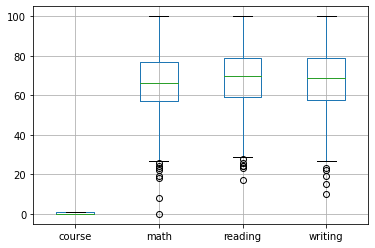

In [62]:
df.boxplot();

#### Корреляция между всеми переменными

In [63]:
df.corr()

,course,math,reading,writing
course,1.000000,0.177702,0.241780,0.312946
math,0.177702,1.000000,0.817580,0.802642
reading,0.241780,0.817580,1.000000,0.954598
writing,0.312946,0.802642,0.954598,1.000000


Чтение и письмо имеют действительно сильную корреляцию.

**Конечно можно использовать графики**

создание рассеянных диаграмм (scatter plots) между парами столбцов "math", "reading" и "writing" в DataFrame "df". Каждый столбец будет использоваться в качестве оси x, а следующий столбец после него будет использоваться в качестве оси y. Если достигнут последний столбец, то он будет привязан к первому столбцу. Размер точек на диаграмме установлен в 10, а прозрачность составляет 0,5. Заголовок каждой диаграммы будет содержать названия двух столбцов, между которыми построена диаграмма.

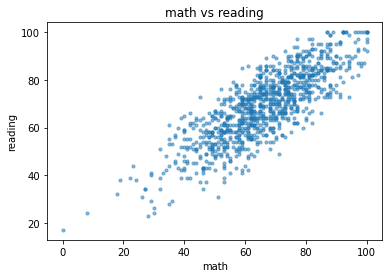

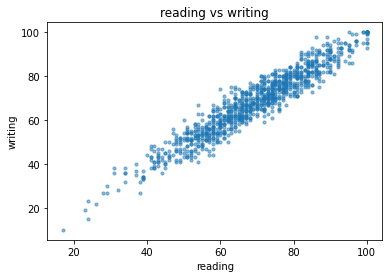

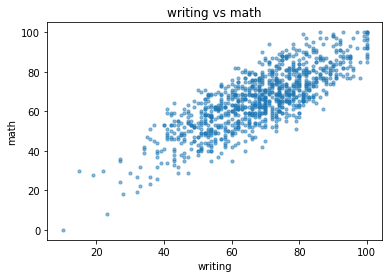

In [64]:
cols = ['math', 'reading', 'writing']
for i, c1 in enumerate(cols):
    c2 = cols[i+1] if i < len(cols)-1 else cols[0]
    df.plot.scatter(x=c1, y=c2, s=10, alpha=.5)
    plt.title(f'{c1} vs {c2}')

**Scatter plots with seaborn**

Seaborn приходит [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

Метод `select_dtype` из библиотеки pandas позволяет выбирать столбцы, основываясь на их типах данных. В качестве аргумента этому методу можно передавать различные значения типов данных, в зависимости от нужных критериев выбора. Некоторые из доступных значений для метода `select_dtype` включают:

- `'object'`: Выбирает столбцы с объектным (строковым) типом данных.
- `'int64'` или `'int'`: Выбирает столбцы с целочисленным типом данных.
- `'float64'` или `'float'`: Выбирает столбцы с типом данных с плавающей точкой.
- `'bool'`: Выбирает столбцы с логическим (булевым) типом данных.
- `'datetime64'`, `'datetime'` или `'datetime64[ns]'`: Выбирает столбцы с типом данных даты и времени.
- `'timedelta'`, `'timedelta64'` или `'timedelta64[ns]'`: Выбирает столбцы с типом данных разницы во времени.

Помимо этого, можно использовать и другие типы данных, такие как `'category'`, `'period'` и другие, в зависимости от особенностей данных и требований выборки.

Пример использования метода `select_dtype`:

```python
df.select_dtype('int64')  # Выбирает все столбцы с целочисленным типом данных
df.select_dtype('object')  # Выбирает все столбцы со строковым типом данных

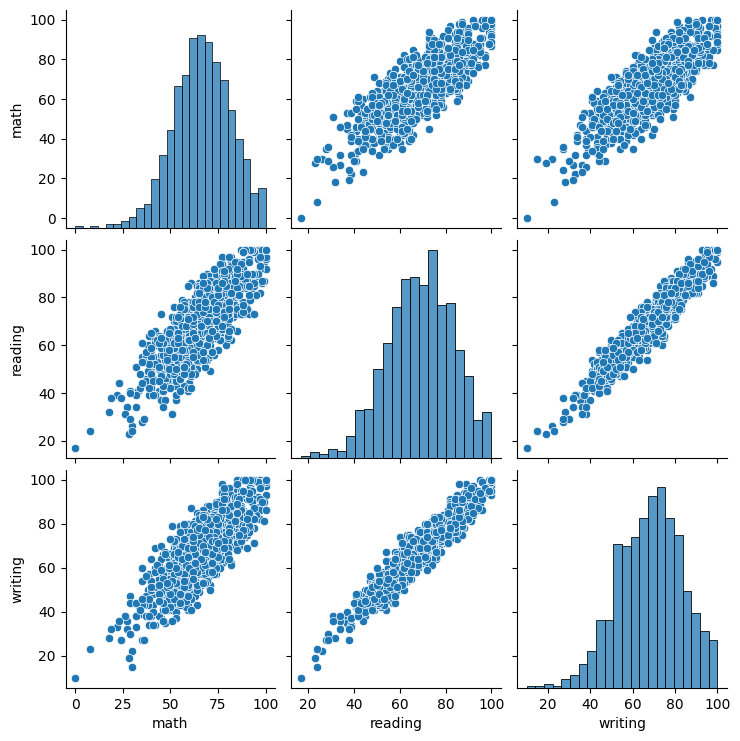

In [112]:
# sns.pairplot(df.select_dtypes('number'), hue = 'math', palette=palette);
# sns.pairplot(df.select_dtypes('number'), hue = 'math')
sns.pairplot(df.select_dtypes('number'))

In [113]:
df[['gender','math', 'reading', 'writing']].sample(5)

,gender,math,reading,writing
929,female,48,56,51
834,male,58,50,45
399,male,60,59,54
401,male,53,43,43
823,female,71,87,82


In [114]:
df[['gender','math', 'reading', 'writing']].describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Pie plot

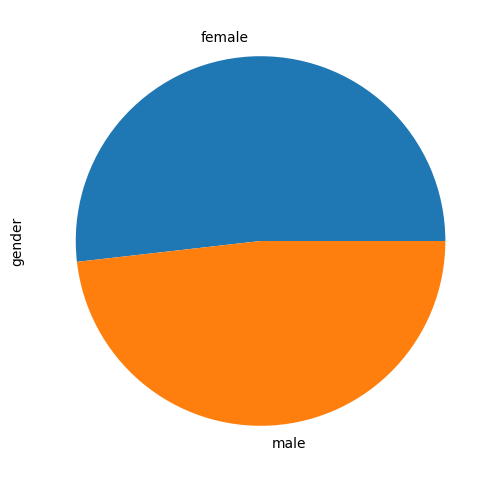

In [115]:
df['gender'].value_counts(normalize=True).plot.pie(figsize=(6,6));

In [116]:
df.groupby('gender').mean()

C:\Users\admin\AppData\Local\Temp/ipykernel_2924/1544238222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('gender').mean()


,course,math,reading,writing
gender,,,,
female,0.355212,63.633205,72.608108,72.467181
male,0.360996,68.728216,65.473029,63.311203


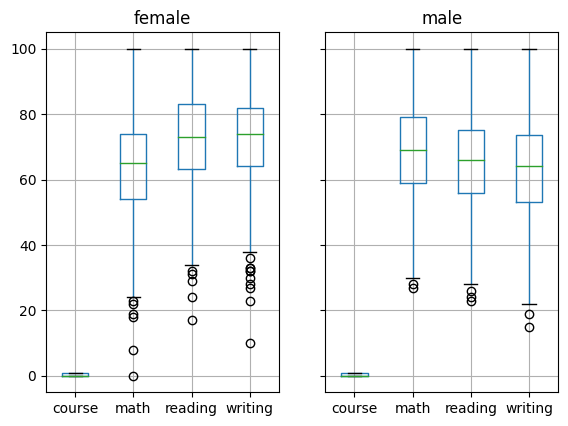

In [117]:
df.groupby('gender').boxplot();

pandas.melt() является мощным методом для раскрытия данных.
Мы собираемся использовать его, чтобы упростить использование некоторых графиков сиборн.

Код выше выполняет следующие действия:

1. `score_cols = df.select_dtypes('number').columns.tolist()`: Получает список столбцов с числовыми значениями из DataFrame `df` и сохраняет его в переменную `score_cols`.
2. `id_vars = [c for c in df.columns if c not in score_cols]`: Создает список столбцов, которые не являются числовыми, путем исключения столбцов из `df.columns`, которые присутствуют в `score_cols`. Сохраняет этот список в переменную `id_vars`.
3. `melted = pd.melt(df, id_vars=id_vars, var_name='skill', value_name='score')`: Использует функцию `melt` из библиотеки pandas для преобразования DataFrame `df`. Столбцы из `id_vars` остаются в начальном виде, столбец `'var_name'` создается для хранения названий столбцов `score_cols`, а столбец `'value_name'` создается для хранения соответствующих числовых значений. Результат сохраняется в переменной `melted`.
4. `melted.head()`: Выводит первые несколько строк DataFrame `melted`.

Таким образом, после выполнения данного кода, переменная `melted` будет содержать "расплавленные" данные с развернутыми числовыми значениями из столбцов `score_cols`, где каждая строка будет представлять собой соответствующую комбинацию значений из `id_vars`, название столбца `skill` и числовое значение `score`.

In [118]:
score_cols = df.select_dtypes('number').columns.tolist()
id_vars = [c for c in df.columns if c not in score_cols]
score_cols, id_vars
melted = pd.melt(df, id_vars=id_vars, var_name='skill', value_name='score')
melted.head()

,gender,group,parental,lunch,course,skill,score
0,female,B,bachelor's degree,standard,False,math,72
1,female,C,some college,standard,True,math,69
2,female,B,master's degree,standard,False,math,90
3,male,A,associate's degree,free/reduced,False,math,47
4,male,C,some college,standard,False,math,76


Когда вы облегчаете чтение для Seaborn, Seaborn облегчит чтение сюжетов для вас.

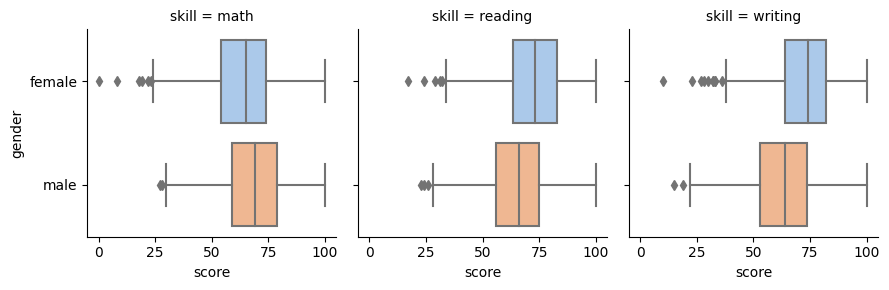

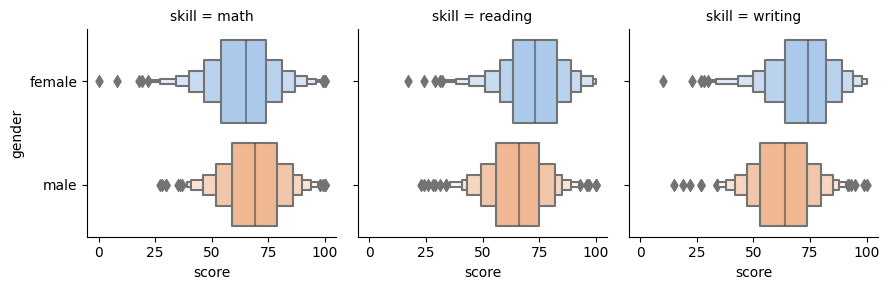

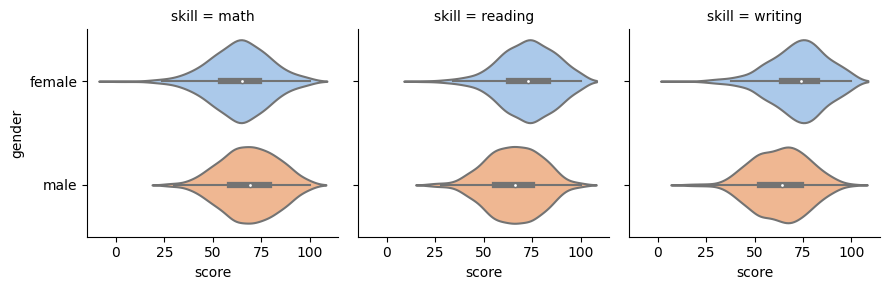

In [119]:
for func in [sns.boxplot, sns.boxenplot, sns.violinplot]:
    g = sns.FacetGrid(melted, col="skill")
    g.map(func, 'score', 'gender', order=None, palette=palette);

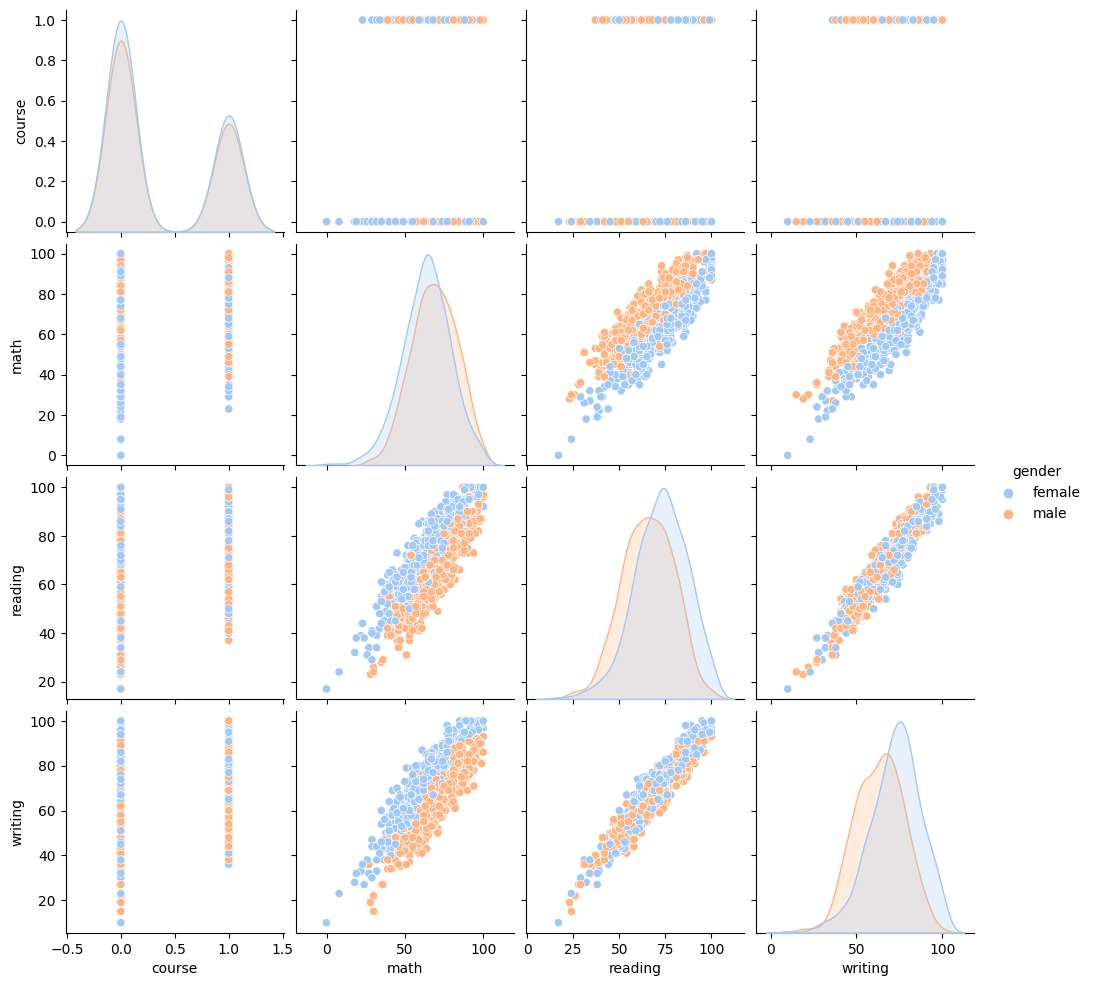

In [120]:
sns.pairplot(df, palette=palette, hue='gender');

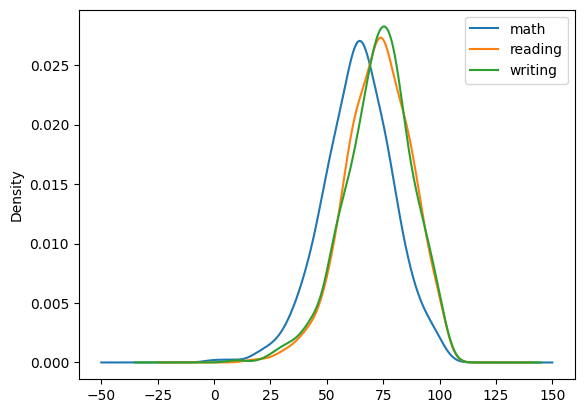

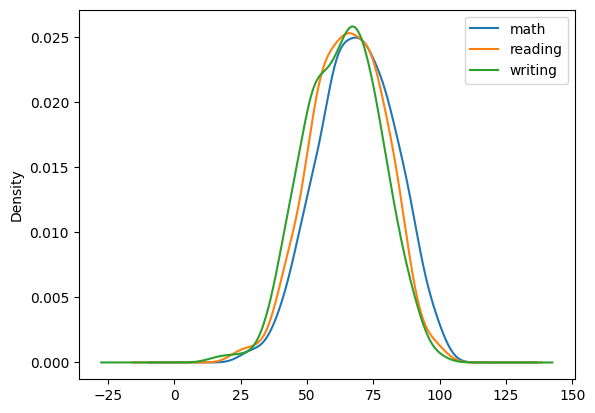

In [121]:
df.groupby('gender').plot.kde();

In [122]:
df['is_female'] = df['gender'].apply(lambda x: 1 if x == 'female' else 0)
df['is_female'] = df['is_female'].astype(float)

df['is_male'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['is_male'] = df['is_male'].astype(float)

df.head()

,gender,group,parental,lunch,course,math,reading,writing,is_female,is_male
0,female,B,bachelor's degree,standard,False,72,72,74,1.0,0.0
1,female,C,some college,standard,True,69,90,88,1.0,0.0
2,female,B,master's degree,standard,False,90,95,93,1.0,0.0
3,male,A,associate's degree,free/reduced,False,47,57,44,0.0,1.0
4,male,C,some college,standard,False,76,78,75,0.0,1.0


Вместо того, чтобы смотреть на корреляцию между всеми переменными, мы хотим увидеть, как эти новые переменные `is_female` коррелирует с оценками.Pandas дает нам метод `dataframe.corrwith ()` для такого рода случаев.

In [123]:
df[['math', 'reading', 'writing']].corrwith(df['is_female'])

math      -0.167982
reading    0.244313
writing    0.301225
dtype: float64

In [124]:
df[['math', 'reading', 'writing']].corrwith(df['is_male'])

math       0.167982
reading   -0.244313
writing   -0.301225
dtype: float64

#### One Hot Encoding

То, что мы только что сделали, известно как One Hot Encoding переменной `gender`.

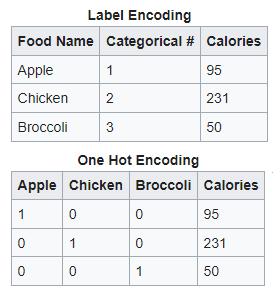

В Pandas есть метод для упрощения такого рода преобразований под названием `get_dummies()`.

`pd.get_dummies()`: Преобразование категориальной переменной в фиктивные/индикаторные переменные.

``python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None,
                   sparse=False, drop_first=False, dtype=None)
```

In [125]:
pd.get_dummies(df['gender']).head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


В примере мы можем использовать этот метод для создания нового DataFrame с баллами и переменной gender. Мы используем `get_dummies()` для кодирования категориальной переменной gender, а затем с помощью метода `pd.concat()` объединяем два DataFrames по горизонтальной оси.

In [126]:
df_encoded = pd.concat([df[['math', 'reading', 'writing']], pd.get_dummies(df['gender'])], axis=1)
df_encoded.head()

,math,reading,writing,female,male
0,72,72,74,1,0
1,69,90,88,1,0
2,90,95,93,1,0
3,47,57,44,0,1
4,76,78,75,0,1


А затем используя еще одну строку кода, мы могли бы прийти к тем же выводам

In [127]:
df_encoded.corr()

,math,reading,writing,female,male
math,1.000000,0.817580,0.802642,-0.167982,0.167982
reading,0.817580,1.000000,0.954598,0.244313,-0.244313
writing,0.802642,0.954598,1.000000,0.301225,-0.301225
female,-0.167982,0.244313,0.301225,1.000000,-1.000000
male,0.167982,-0.244313,-0.301225,-1.000000,1.000000


**Extra**

Большинство ML-моделей не работают с категориальными переменными. Вы познакомитесь с методом get_dummies() из pandas или аналогичными методами из других библиотек для подготовки данных, которые будут использоваться в ваших моделях. Иногда удобно нормализовать или стандартизировать данные. Мы уже знаем, что новый набор данных варьируется, поэтому мы можем нормализовать его одной строкой кода.

In [130]:
df_normalized = df_encoded.div(df_encoded.max() - df_encoded.min())
df_normalized.head()

,math,reading,writing,female,male
0,0.72,0.867470,0.822222,1.0,0.0
1,0.69,1.084337,0.977778,1.0,0.0
2,0.90,1.144578,1.033333,1.0,0.0
3,0.47,0.686747,0.488889,0.0,1.0
4,0.76,0.939759,0.833333,0.0,1.0


Этот код нормализует значения в `df_encoded` путем деления каждого значения на диапазон значений в `df_encoded`. Полученный нормализованный DataFrame сохраняется в `df_normalized`, а первые несколько строк отображаются с помощью функции `head()`.

Новый набор данных `df_normalized` выглядит как общий набор данных для любого алгоритма ML.

И мы можем убедиться, что после нормализации корреляции не изменились.

In [129]:
df_normalized.corr().round(14) == df_encoded.corr().round(14)

,math,reading,writing,female,male
math,True,True,True,True,True
reading,True,True,True,True,True
writing,True,True,True,True,True
female,True,True,True,True,True
male,True,True,True,True,True


### Heatmap

[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html): Отображение прямоугольных данных в виде матрицы с цветовой кодировкой.

Heatmap - отличный инструмент для построения корреляций признаков

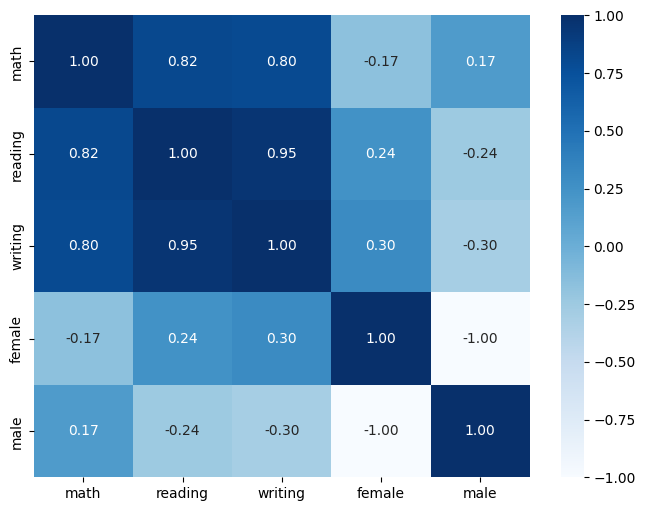

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.heatmap(df_normalized.corr(), annot=True, fmt='.2f', cmap='Blues', ax=ax);

Данный код создает тепловую карту с помощью функции `sns.heatmap()` из библиотеки seaborn. Тепловая карта отображает корреляционную матрицу нормализованного DataFrame `df_normalized`. Коэффициенты корреляции аннотируются на тепловой карте с помощью параметра `annot=True` и форматируются для отображения двух десятичных знаков с помощью `fmt='.2f'`. Используемая цветовая карта - 'Blues'. Размер фигуры установлен на 8x6 дюймов с помощью параметра `figsize=(8,6)`, а тепловая карта отображается на одной подплощадке с помощью параметра `ax=ax`.

### Кто прошел?

In [132]:
approval_threshold = 40

In [134]:
df['approved'] = df['math'] >= approval_threshold
df['approved'] = df['approved'].astype(int)
df.head()

,gender,group,parental,lunch,course,math,reading,writing,is_female,is_male,approved
0,female,B,bachelor's degree,standard,False,72,72,74,1.0,0.0,1
1,female,C,some college,standard,True,69,90,88,1.0,0.0,1
2,female,B,master's degree,standard,False,90,95,93,1.0,0.0,1
3,male,A,associate's degree,free/reduced,False,47,57,44,0.0,1.0,1
4,male,C,some college,standard,False,76,78,75,0.0,1.0,1


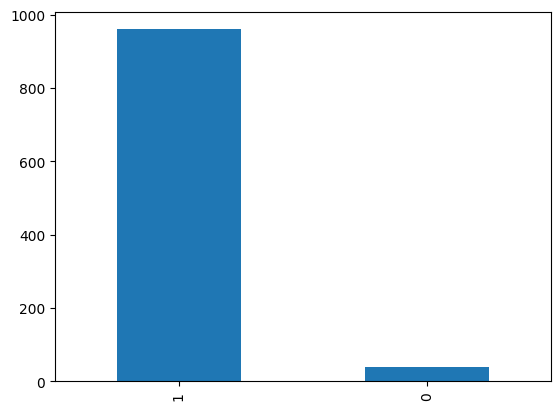

In [136]:
df['approved'].value_counts(normalize=False).plot.bar();

In [139]:
df[['approved']].value_counts()

approved
1           960
0            40
dtype: int64

У Seaborn есть метод для графиков количества значений функции.

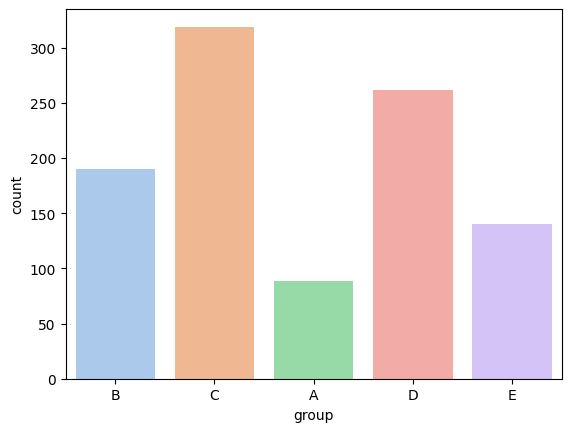

In [140]:
sns.countplot(data=df, x='group', palette=palette);

Проблема заключается в том, что метод countplot не *считает* с параметром normalize. Поэтому попытка построить нормализованную версию не так проста, как при использовании pandas (``Series.value_counts(normalize=True).plot.bar()``)

In [141]:
df['approved'].value_counts(normalize=True).to_frame()

,approved
1,0.96
0,0.04


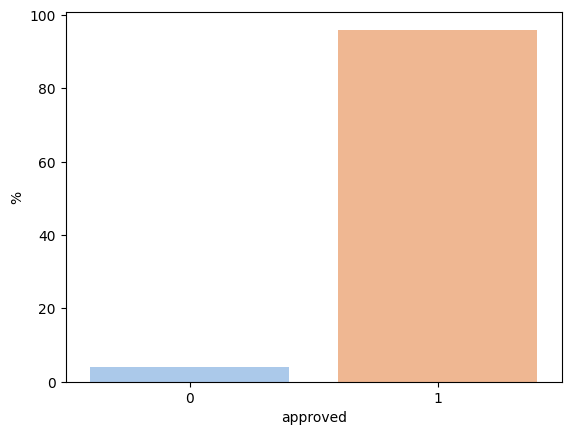

In [142]:
sns.barplot(data=((df['approved'].value_counts(normalize=True)*100).to_frame()
                     .reset_index().rename(columns={'approved': '%', 'index': 'approved'})),
            x='approved',
            y='%',
            palette=palette);

In [143]:
df[['gender', 'course', 'reading', 'writing', 'math']].groupby('gender').corrwith(df['approved'])

,course,reading,writing,math
gender,,,,
female,0.102233,0.513812,0.549594,0.548292
male,0.071767,0.317447,0.331337,0.339371


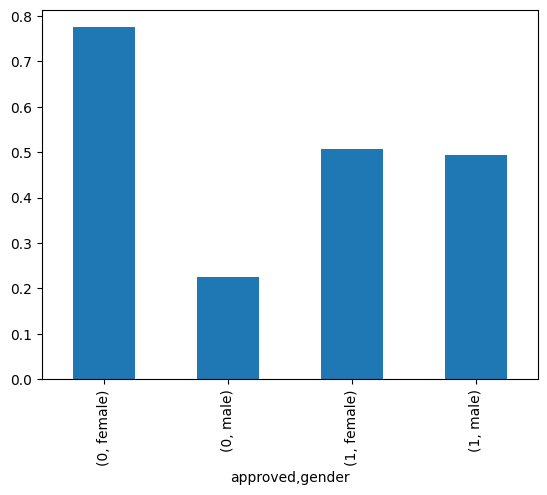

In [144]:
df.groupby('approved')['gender'].value_counts(normalize=True).plot.bar();

Мы постараемся сделать тот же uhfabr с Seaborn

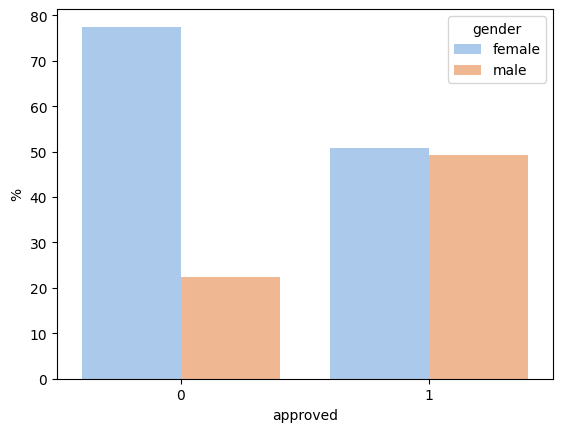

In [145]:
tmp = (df.groupby('approved')['gender'].value_counts(normalize=True).to_frame().rename(columns={'gender': '%'})*100).reset_index()
sns.barplot(data=tmp, x='approved', y='%', hue='gender', palette=palette);

## Годы в ячейке

При построении графиков можно использовать один из этих четырех подходов:

- Pandas
- Pandas + Matplotlib
- Pandas + Seaborn
- Pandas + Seaborn + Matplotlib

**Pandas**  
- Обучение: легко
- Визуальный ряд по умолчанию: плохой
- Пользовательский визуальный ряд: обычный
- СОВЕТ: достаточно знать, какие методы построения графиков реализованы в pandas, чтобы начать строить графики для извлечения информации (но, возможно, не для презентации).

**Pandas + Matplotlib**  
- Обучение: сложное
- Визуальный ряд по умолчанию: обычный
- Пользовательская визуализация: отличная, но сложная (все дело в изучении matplotlib, нелегко начинать с нуля)
- СОВЕТ: Подумайте, какой график вам нужен, а затем используйте DataFrame.groupby или какое-нибудь условие, примененное к датафрейму, - этого будет достаточно, чтобы накормить ваши графики.

**Pandas + Seaborn**.   
- Обучение: хорошо
- Визуальный ряд по умолчанию: хорошо
- Пользовательский визуальный ряд: очень хорошо
- СОВЕТ: Seaborn - это практически подготовка фрейма данных для получения нужной вам диаграммы Seaborn. Поэтому вам необходимо ознакомиться с доступными графиками Seaborn и, возможно, потратить некоторое время на изучение методов pandas, таких как `melt` и `pivot`, чтобы преобразовать кадр данных во входной вид тех, которые нравятся Seaborn.

**Pandas + Matplotlib + Seaborn**.   
- Обучение: сложно
- Визуальный ряд по умолчанию: хорошо
- Пользовательский визуальный ряд: отлично
- СОВЕТ: Небо - это предел. Помните, что seaborn был создан на основе matplotlib.

**Метод `melt()` в Pandas:**

Метод `melt()` в Pandas используется для "растапливания" (unmelting) или преобразования широкого формата данных в длинный формат. Он преобразует столбцы в строки, сохраняя одну или несколько столбцов их идентификаторами.

Синтаксис:
```python
pd.melt(frame, id_vars = None, value_vars = None, var_name = None, value_name = 'value')
```

- `frame`: DataFrame, который нужно "растопить".
- `id_vars`: Столбцы, которые нужно оставить в неизменном виде и использовать в качестве идентификаторов.
- `value_vars`: Столбцы, которые нужно преобразовать в столбец значения.
- `var_name`: Название столбца, содержащего переменные, если не указано, будет использоваться 'variable'.
- `value_name`: Название столбца, содержащего значения, если не указано, будет использоваться 'value'.

Пример использования:
```python
import pandas as pd

# Создаем DataFrame
df = pd.DataFrame({
    'Name': ['John', 'Megan'],
    'Math': [80, 90],
    'Science': [70, 85]
})

# Переводим столбцы Math и Science в строки, оставляя Name как идентификатор
melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Math', 'Science'], var_name='Subject', value_name='Score')

print(melted_df)
```

**Вывод:**
```
    Name  Subject  Score
0   John     Math     80
1  Megan     Math     90
2   John  Science     70
3  Megan  Science     85
```

В данном примере, столбцы 'Math' и 'Science' были преобразованы в столбец 'Subject', а значения в этих столбцах были преобразованы в столбец 'Score'. Столбец 'Name' остался неизменным и использовался в качестве идентификатора.

**Метод `pivot()` в Pandas:**

Метод `pivot()` используется для сводных таблиц (pivot tables). Он позволяет переставить данные в DataFrame, делая индексом один столбец и создавая новые столбцы на основе значений другого столбца.

Синтаксис:
```python
df.pivot(index, columns, values)
```

- `index`: Столбец, который будет использоваться в качестве индекса в новом DataFrame.
- `columns`: Столбец, значения которого будут использоваться для создания новых столбцов в новом DataFrame.
- `values`: Столбец, значения которого будут заполнять новый DataFrame.

Пример использования:
```python
import pandas as pd

# Создаем DataFrame
df = pd.DataFrame({
    'Name': ['John', 'Megan', 'John', 'Megan'],
    'Subject': ['Math', 'Math', 'Science', 'Science'],
    'Score': [80, 90, 70, 85]
})

# Создаем сводную таблицу на основе столбцов Name, Subject и Score
pivot_df = df.pivot(index='Name', columns='Subject', values='Score')

print(pivot_df)
```

**Вывод:**
```
Subject  Math  Science
Name                   
John       80       70
Megan      90       85
```

В данном примере, столбцы 'Name', 'Subject' и 'Score' были использованы для создания сводной таблицы. Значения в столбце 'Name' служат в качестве индекса нового DataFrame. Столбцы 'Subject' становятся новыми столбцами, а значения в столбце 'Score' заполняют новый DataFrame.

Механизм работы этих методов:
- `melt()`: Метод `melt()` преобразует столбцы в строки, переворачивая DataFrame по вертикали. ID столбцы (указанные в `id_vars`) остаются неизменными, значения других столбцов (указанные в `value_vars`) объединяются в один столбец, а их идентификаторы соответствующих столбцов хранятся в новом столбце 'variable'.
- `pivot()`: Метод `pivot()` переворачивает (поворачивает) DataFrame по горизонтали. Он преобразует уникальные значения в `index` строками и/или `columns` столбцами сводной таблицы. Значения для заполнения нового DataFrame задаются в столбце `values`. Если в исходном DataFrame есть несколько значений для каждой комбинации индекса и столбцов, метод `pivot()` автоматически агрегирует значения с помощью функций, таких как `mean()` или `sum()`.

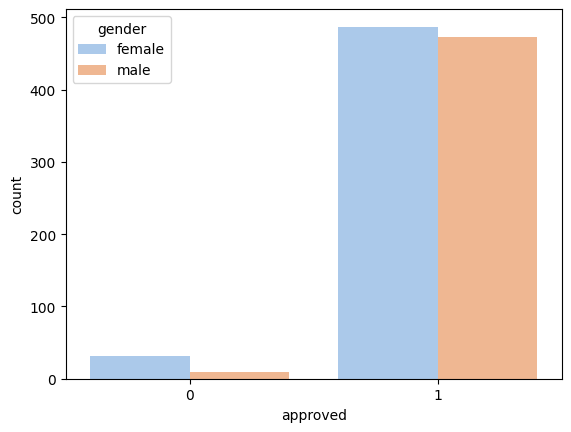

In [147]:
sns.countplot(data=df, x='approved', hue='gender', palette=palette);

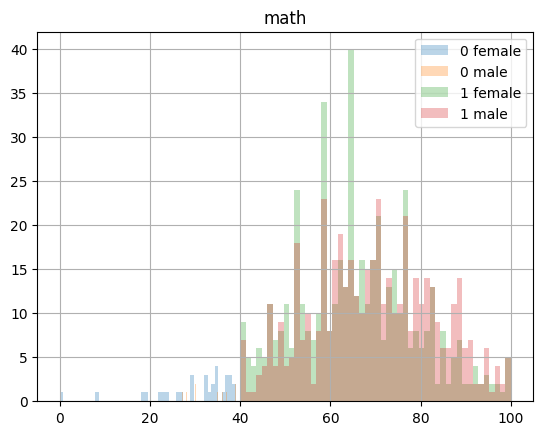

In [148]:
ax = plt.subplot()
for group, g in df.groupby(['approved','gender']):
    g[['math']].hist(bins=50, ax=ax, alpha=.3, label=f'{group[0]} {group[1]}');
plt.legend();

Этот код строит гистограммы столбца 'math' в DataFrame 'df' для каждой комбинации столбцов 'approved' и 'gender'. Для построения графика используется matplotlib.

Ниже приводится описание работы кода:

1. Переменная 'ax' создается с помощью функции 'plt.subplot()'. При этом создается новая подплощадка для графика.

2. DataFrame 'df' группируется по столбцам 'approved' и 'gender' с помощью функции 'groupby()'.

3. Для перебора каждой группы используется цикл. Для каждой группы создается гистограмма по столбцу 'math' и строится с помощью функции 'g[['math']].hist()'. Параметр 'bins' имеет значение 50, которое задает количество бинов для гистограммы.

4. Параметр 'alpha' имеет значение 0,3, которое определяет прозрачность гистограмм.

5. Параметр 'label' задается в виде форматированной строки, включающей значения столбцов 'approved' и 'gender' для текущей группы. Это добавляет метку к каждой гистограмме.

6. После цикла вызывается функция 'plt.legend()' для отображения легенды на графике.

В целом данный код представляет собой полезный способ визуализации распределения столбца 'math' в DataFrame 'df' для различных комбинаций столбцов 'approved' и 'gender'.

Чтобы построить аналогичный график с помощью seaborn, необходимо преобразовать кадр данных, как в случае с `melted`, и добавить новый столбец, представляющий комбинацию пола и одобрения. Иногда лучше поискать альтернативные варианты, позволяющие провести тот же анализ без лишнего кодирования

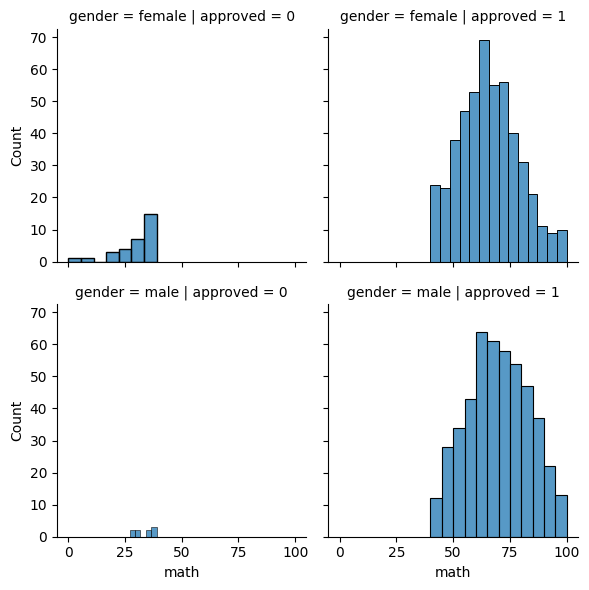

In [150]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'math');

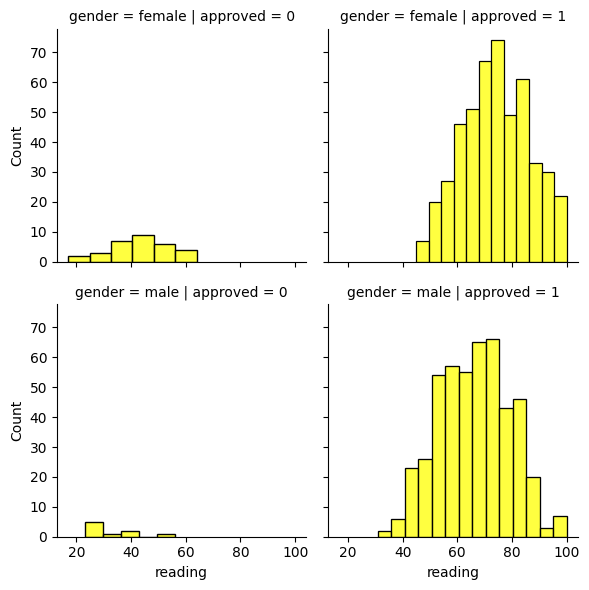

In [159]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'reading', color = 'yellow');

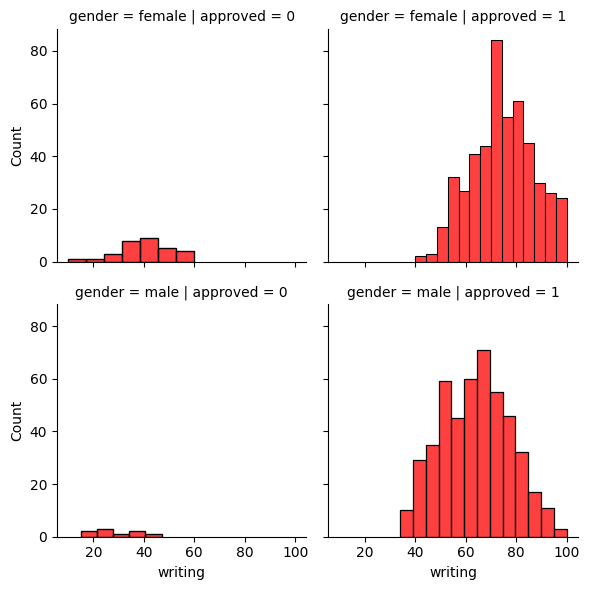

In [157]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'writing', color = 'red');

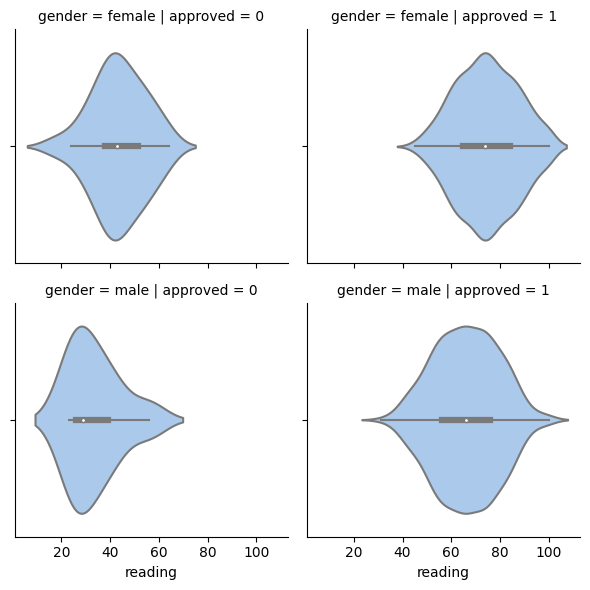

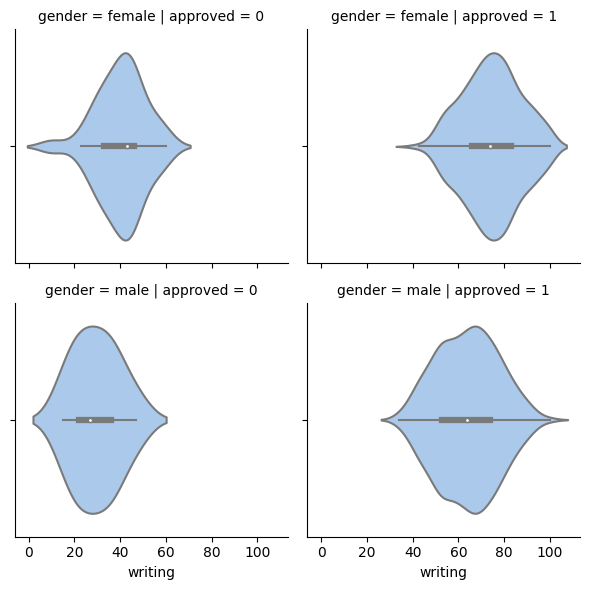

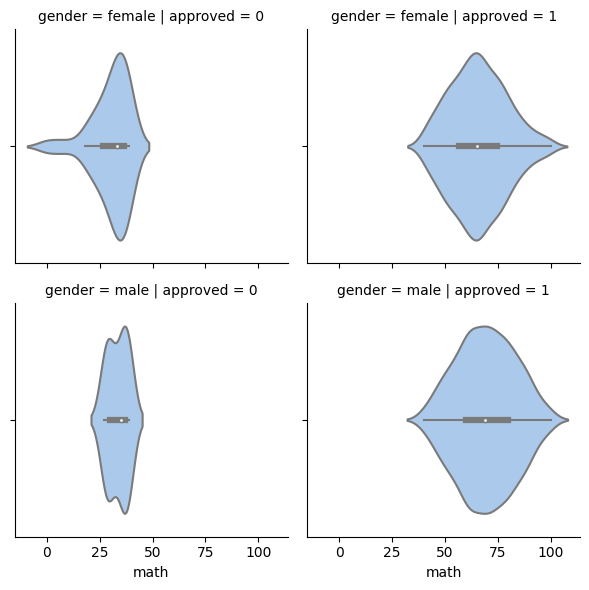

In [162]:
# Давайте повторим три функции со скрипками
for feature in ['reading', 'writing', 'math']:
    g = sns.FacetGrid(df, col='approved', row='gender', sharex=True, sharey=True)
    g.map(sns.violinplot, feature, order=None, palette=palette);

Если мы подготовим данные для Seaborn, Seaborn даст то, что мы хотим.Например, `seaborn.violinplot ()` разрешает разделить распределение скрипки, используя вторичную бинарную функцию `hue '.Но это может быть сделано при использовании параметров `x` и` y`.В этом случае мы можем использовать фиктивную функцию, чтобы построить то, что мы хотим.
Зная, что это поможет нам улучшить наш предыдущий сюжет.

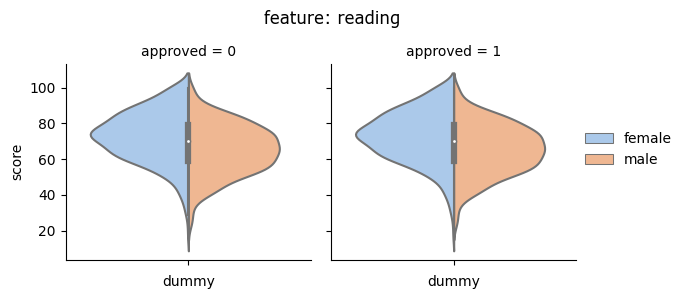

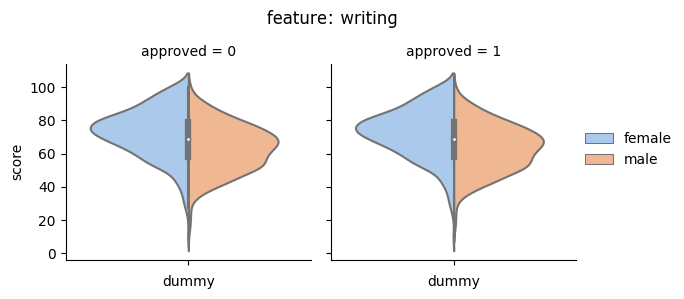

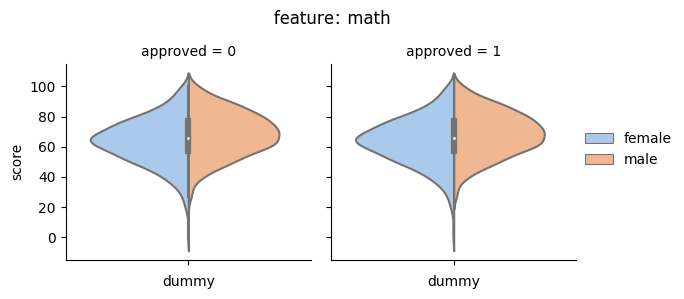

In [163]:
df['dummy'] = ''
# let's repeat the three features with violinplots
for feature in ['reading', 'writing', 'math']:
    g = sns.FacetGrid(df, col='approved', sharey=True)
    g.map(sns.violinplot, data=df, x='dummy', y=feature, hue='gender', split=True, order=None, palette=palette);
    g.add_legend() # we want to display the gender legend
    g.set_ylabels('score')
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'feature: {feature}', fontsize=12, font='verdana')
del df['dummy']

### PairGrid

seaborn.PairGrid() это отличный инструмент, который позволяет нам легко вытянуть морские участки.

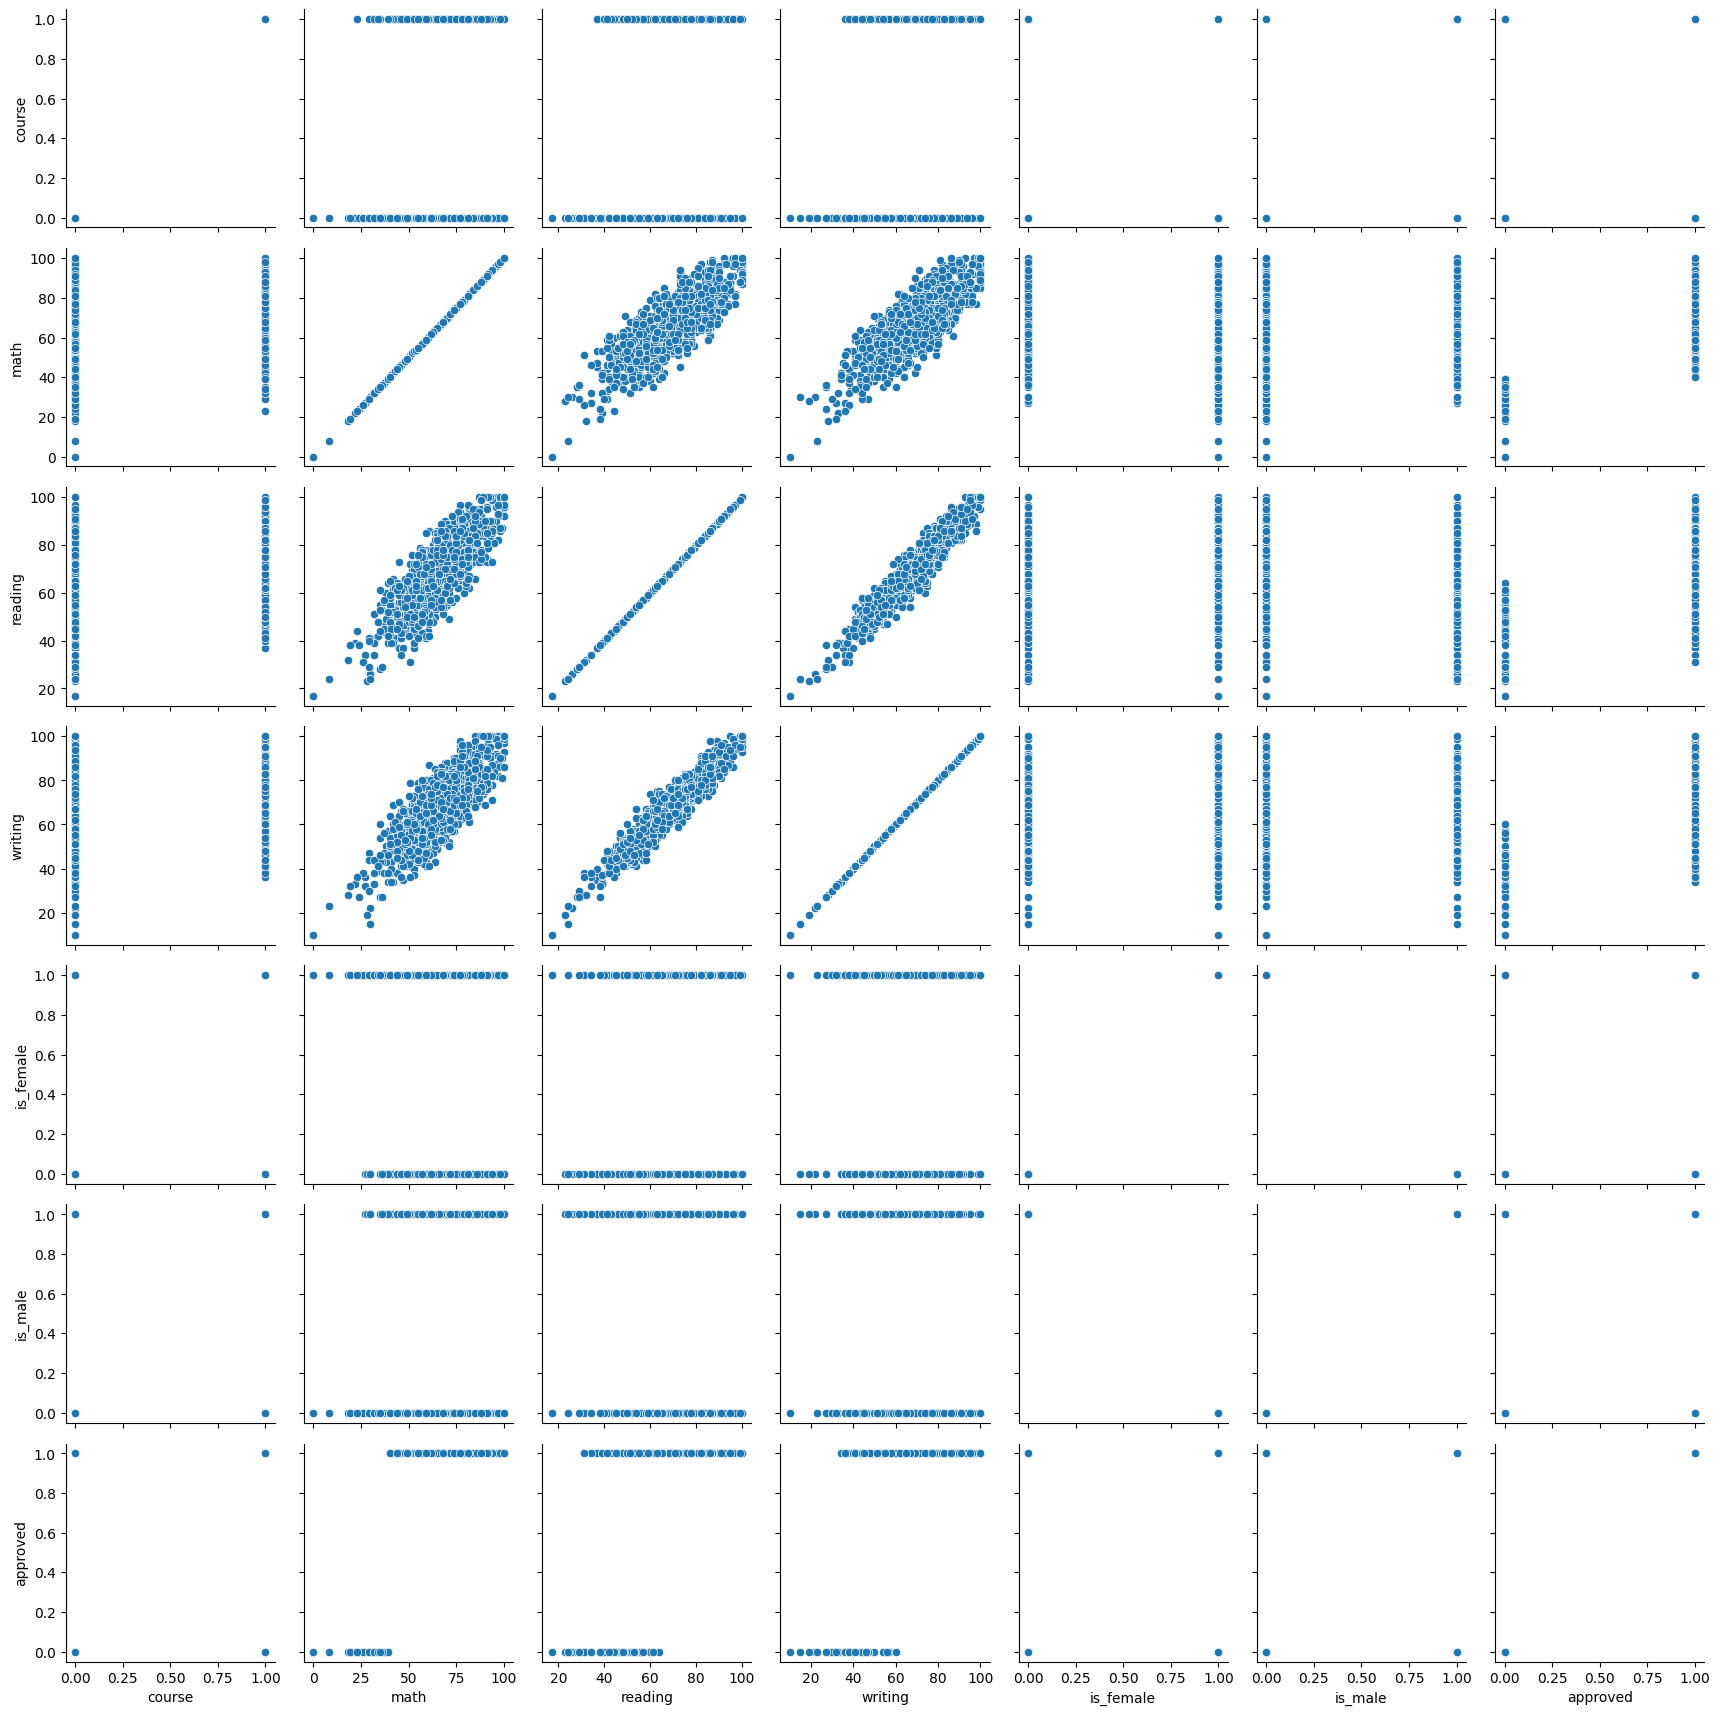

In [166]:
# это должно сделать что -то похожее на parplot (), но без установки гистограммы в диагонали
g = sns.PairGrid(df)
g.map(sns.scatterplot);
# Вероятно, этот код пытается использовать функцию `map()` из библиотеки `seaborn` для создания диаграмм рассеяния для каждой группы в кадре данных 'g'. 
# `sns.scatterplot" - это функция, которая будет отображена на каждую группу.

Использование Сиборновских ящиков для сравнения общих функций Quartes

- [seaborn.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [pandas.melt()](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [167]:
del df['is_female']
del df['is_male']

Возможно, вы не увидели возможности PairGrids. Давайте попробуем еще раз, создав новый пользовательский график PairGrid с многомерными вложенными графиками KDE

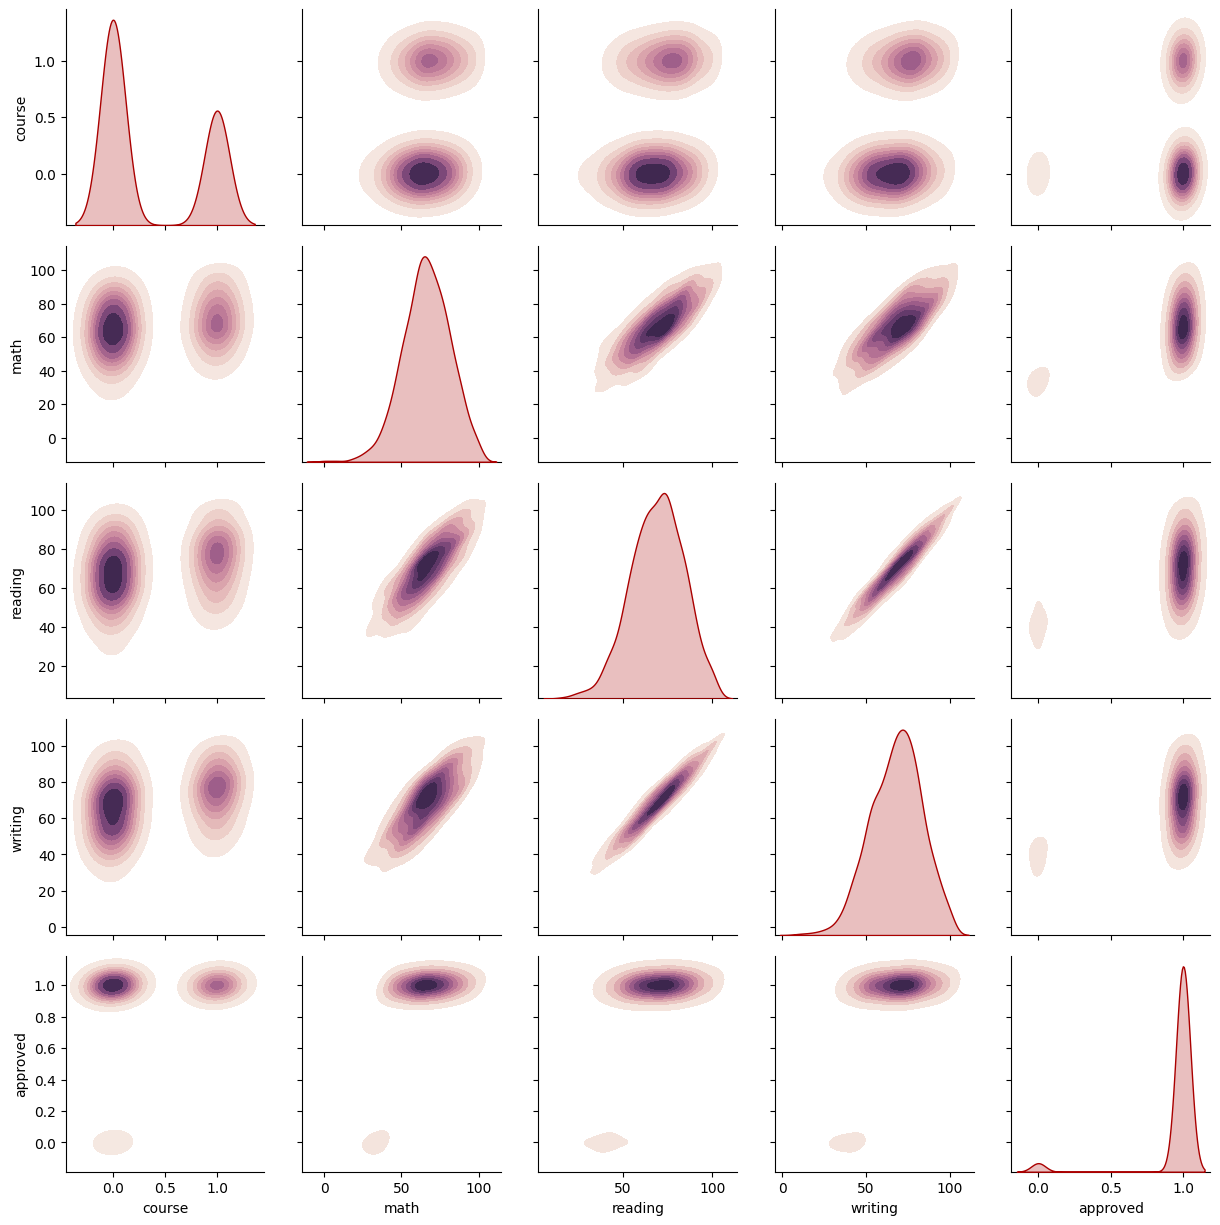

In [168]:
# Create a cubehelix colormap to use with kdeplot
cmap = sns.cubehelix_palette(start=0, light=.95, as_cmap=True)
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.kdeplot, cmap=cmap, fill=True)
g.map_lower(sns.kdeplot, cmap=cmap, fill=True)
g.map_diag(sns.kdeplot, color='#aa0000', fill=True);

# Реферат

**В этой лекции вы узнали:**

### <center>Некоторые важные моменты при использовании SEABORN с PANDAS!</center>


- Важность графиков
- Использование pandas для EDA
- Понятие "горячего" кодирования (One Hot Encoding)

**Pandas**
- pandas.read_csv()
- pandas.concat()
- pandas.get_dummies()
- DataFrame.info()
- DataFrame.head()
- DataFrame.sample()
- DataFrame.describe()
- DataFrame.unique()
- DataFrame.str
- DataFrame.grouby()
- DataFrame.sourt_values()
- DataFrame.corr()
- DataFrame.corrwith()
- DataFrameGroupBy.size()

**Pandas (построение графиков)**
- DataFrame.boxplot()
- DataFrame.hist()
- DataFrame.plot()
- DataFrame.plot.kde()
- DataFrame.plot.pie()
- DataFrame.plot.scatter()

**matplotlib**
- matplotlib.pyplot.subplots()
- matplotlib.pyplot.title()
- matplotlib.pyplot.plot()
- matplotlib.pyplot.suptitle()
- matplotlib.pyplot.subplot()
- matplotlib.pyplot.subplots_adjust()
- matplotlib.pyplot.ylabel()
- matplotlib.pyplot.legend()
- matplotlib.pyplot.figure()

**seaborn**
- seaborn.boxplot()
- seaborn.boxenplot()
- seaborn.histplot()
- seaborn.barplot()
- seaborn.countplot()
- seaborn.scatterplot()
- seaborn.violinplot()
- seaborn.lineplot()
- seaborn.pairplot()
- seaborn.heatmap()
- seaborn.kdeplot()
- seaborn.FacetGrid()
- seaborn.PairGrid()